# Diabetes Health Indicators Dataset

## A brief description of the data used in the notebook

The objective of the BRFSS is to collect uniform, state-specific data on preventive health practices and risk behaviors that are linked to chronic diseases, injuries, and preventable infectious diseases in the adult population. Factors assessed by the BRFSS include tobacco use, health care coverage, HIV/AIDS knowledge or prevention, physical activity, and fruit and vegetable consumption. Data are collected from a random sample of adults (one per household) through a telephone survey.

The Behavioral Risk Factor Surveillance System (BRFSS) is the nation's premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services. Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.

### The raw data from 2019 and their description can be found here: 
https://www.cdc.gov/brfss/annual_data/annual_2019.html

### Selected Subset of Features from BRFSS 2019

Given main risk factors, I tried to select features (columns/questions) in the BRFSS related to risk factors for diabetes. To help understand what the columns mean, I consult the BRFSS 2019 Codebook to see the questions and information about the questions. I try to match the variable names in the codebook to the variable names in the dataset. I also reference some of the same features chosen for a research paper by Zidian Xie et al for Building Risk Prediction Models for Type 2 Diabetes Using Machine Learning Techniques using data from the 2014 BRFSS.

### BRFSS 2015 Codebook:
https://www.cdc.gov/brfss/annual_data/2019/pdf/codebook19_llcp-v2-508.HTML

### Relevant Research Paper using BRFSS for Diabetes ML: 
https://www.cdc.gov/pcd/issues/2019/19_0109.htm

****
### Purpose

The main purpose of this code notebook is to answer the question:

* **Can survey questions from the BRFSS provide accurate predictions of whether an individual has diabetes?**
****

The **selected features** from the BRFSS 2019 dataset are:

##### Response Variable / Dependent Variable:
1. **Diabetes**
    * (Ever told) (you had) diabetes? (If ´Yes´ and respondent is female, ask ´Was this only when you were pregnant?´. If Respondent says pre-diabetes or borderline diabetes, use response code 4.) --> DIABETE4

##### Independent Variables:

1. **High Blood Pressure**
    * Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional --> _RFHYPE5


2. **High Cholesterol**
    * Have you ever been told by a doctor, nurse or other health professional that your blood cholesterol is high? --> TOLDHI2
    * Cholesterol check within past five years --> _CHOLCH2


3. **BMI**
    * Body Mass Index (BMI) --> _BMI5


4. **Smoking**
    * Have you smoked at least 100 cigarettes in your entire life? [Note:  5 packs = 100 cigarettes] --> SMOKE100
    
    
5. **Alcohol Consumption**
    * Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) --> _RFDRHV7
    

6. **Diet**
    * Consume Fruit 1 or more times per day --> _FRTLT1A
    * Consume Vegetables 1 or more times per day --> _VEGLT1A


7. **Other Chronic Health Conditions**
    * (Ever told) (you had) a depressive disorder (including depression, major depression, dysthymia, or minor depression)? --> ADDEPEV3 
    * (Ever told) (you had) chronic obstructive pulmonary disease, C.O.P.D., emphysema or chronic bronchitis? --> CHCCOPD2 
    * Computed asthma status --> _ASTHMS1 
    * (Ever told) you had a stroke --> CVDSTRK3 
    * (Ever told) you had a heart attack, also called a myocardial infarction? --> CVDINFR4 
    * (Ever told) you had angina or coronary heart disease? --> CVDCRHD4


8. **Psyhical Activity**
    * Adults who reported doing physical activity or exercise during the past 30 days other than their regular job --> _TOTINDA


9. **Health Care**
    * Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? --> MEDCOST
    * Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? --> HLTHPLN1


10. **Health General and Mental Health**
    * Would you say that in general your health is: --> GENHLTH
    * Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? --> MENTHLTH
    * Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? --> PHYSHLTH
    * Do you have serious difficulty walking or climbing stairs? --> DIFFWALK


11. **Demographics**
    * Fourteen-level age category --> _AGEG5YR
    * Calculated sex variable --> _SEX
    * What is the highest grade or year of school you completed? --> EDUCA
    * Income categories --> _INCOMG
    
    

## Notebook organization:
* Convert data from a SAS format to CSV format
* Create datasets with selected variables
* Clean the data
	- Modify and clean the values to be more suitable to ML algorithms
* Create Binary Dataset for diabetes vs. no diabetes
* EDA
	- Information of variables
	- Correlation between variables
	- Visualization of relationships between variables
* Trening and test data
* Model selection and evaluation functions
* Baseline models
* Modelling
	- Logistic Regression
	- SVM
	- Decision Tree Classifier
	- Random Forest Classifier
	- XGBoost Classifier
* Metrics
* Oversampling dataset
	- New trening and test data
	- Decision Tree Classifier on the oversampled dataset
	- XGBoost Classifier on the oversampled dataset
	- Metrics
* Conclusions
* Discussion

In [2]:
# Standard imports
import numpy as np
import pandas as pd

# EDA imports
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
px_template = "simple_white"

# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Classifiers imports
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Metrics imports
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, precision_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

# Save models imports
from joblib import dump, load

C:\Users\mateusz.wuchnicki\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


This is just for the final presentation, to make the notebook look nicer.

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Convert data from a SAS format to CSV format

Let's import raw data from SAS format and convert data from SAS format to CSV format.

In [3]:
raw_df = pd.read_sas("raw_data/BRFSS_2019.XPT")
raw_df.to_csv('raw_data/BRFSS_2019.csv', sep=",", index=False)

Let's check the shape of our raw data.

In [4]:
BRFSS_2019 = pd.read_csv(r"raw_data/BRFSS_2019.csv")
BRFSS_2019.shape

(418268, 342)

## Create datasets with selected variables

**At this point we have 418268 records and 342 columns. Each record contains an individual's BRFSS survey responses.**

Let's create a set with the selected variables and take a look at the first 5 lines of our data.

In [5]:
df = BRFSS_2019[['DIABETE4', 
                 '_RFHYPE5',
                 'TOLDHI2', '_CHOLCH2',
                 '_BMI5', 
                 'SMOKE100', '_RFDRHV7',
                 '_FRTLT1A', '_VEGLT1A',
                 'ADDEPEV3', 'CHCCOPD2', '_ASTHMS1', 'CVDSTRK3', 'CVDINFR4', 'CVDCRHD4',
                 '_TOTINDA',
                 'MEDCOST', 'HLTHPLN1',
                 'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK',
                 '_AGEG5YR', '_SEX', 'EDUCA', '_INCOMG']].astype(float)
df.head()

,DIABETE4,_RFHYPE5,TOLDHI2,_CHOLCH2,_BMI5,SMOKE100,_RFDRHV7,_FRTLT1A,_VEGLT1A,ADDEPEV3,...,MEDCOST,HLTHPLN1,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,EDUCA,_INCOMG
0,3.0,2.0,1.0,1.0,2817.0,1.0,1.0,1.0,1.0,2.0,...,2.0,1.0,3.0,88.0,15.0,1.0,13.0,2.0,3.0,2.0
1,3.0,1.0,2.0,1.0,1854.0,2.0,1.0,1.0,1.0,2.0,...,2.0,1.0,4.0,88.0,10.0,2.0,11.0,2.0,5.0,3.0
2,1.0,2.0,2.0,1.0,3162.0,2.0,1.0,1.0,1.0,2.0,...,2.0,1.0,3.0,30.0,88.0,1.0,10.0,2.0,6.0,5.0
3,3.0,2.0,2.0,1.0,2030.0,NaN,9.0,9.0,9.0,2.0,...,2.0,1.0,4.0,88.0,30.0,NaN,13.0,2.0,5.0,4.0
4,3.0,1.0,1.0,1.0,2148.0,1.0,1.0,1.0,1.0,2.0,...,2.0,1.0,2.0,88.0,88.0,2.0,13.0,2.0,5.0,9.0


Let's check the shape of our set with selected variables.

In [6]:
df.shape

(418268, 26)

**Now the new Data Frame have 418268 records and 26 selected columns**

## Clean the data

In this section, we will both prepare variables for future predictive models and deal with missing data and duplicates.

We prepare each variable data set step by step.

#### Drop missing values

In [7]:
df = df.dropna()
df.shape

(355411, 26)

We immediately deleted over 62,000 rows that did not contain all the information.

Let's check to be sure that the variables do not contain the missing values.

In [8]:
df.isnull().sum()

DIABETE4    0
_RFHYPE5    0
TOLDHI2     0
_CHOLCH2    0
_BMI5       0
SMOKE100    0
_RFDRHV7    0
_FRTLT1A    0
_VEGLT1A    0
ADDEPEV3    0
CHCCOPD2    0
_ASTHMS1    0
CVDSTRK3    0
CVDINFR4    0
CVDCRHD4    0
_TOTINDA    0
MEDCOST     0
HLTHPLN1    0
GENHLTH     0
MENTHLTH    0
PHYSHLTH    0
DIFFWALK    0
_AGEG5YR    0
_SEX        0
EDUCA       0
_INCOMG     0
dtype: int64

#### Drop duplicates

In [9]:
df = df.drop_duplicates()
df.shape

(352127, 26)

We immediately deleted less than 3,500 rows that were duplicates.

### Modify and clean the values to be more suitable to ML algorithms

In order to do this part, let's refer to the codebook which tells us what each column / feature / question is.
https://www.cdc.gov/brfss/annual_data/2019/pdf/codebook19_llcp-v2-508.HTML

Let's create a few functions that will allow us to order the independent variables.

In [10]:
def CleanDiabete(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 0 was no diabetes or only during pregnancy,
         - 1 is prediabetes or borderline diabetes,
         - 2 is a diabetic respondent
    '''
    
    df.drop(df[(df["DIABETE4"] == 7) | (df["DIABETE4"] == 9)].index, inplace=True)
    df['DIABETE4'] = [0 if (x == 2 or x == 3) else (1 if x == 4 else 2) for x in df['DIABETE4']]
    return df

In [11]:
CleanDiabete(df);

In [12]:
def CleanHighBlood(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 0 is the respondent without high blood pressure,
         - 1 is the respondent with high blood pressure
    '''
    
    df.drop(df[(df["_RFHYPE5"] == 9)].index, inplace=True)
    df['_RFHYPE5'] = [0 if x == 1 else 1 for x in df['_RFHYPE5']]
    return df

In [13]:
CleanHighBlood(df);

In [14]:
def CleanCholAware(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 0 is the doctor never told the respondent that he had high cholesterol,
         - 1 is the doctor told the respondent that he had high cholesterol
    '''
    
    df.drop(df[(df["TOLDHI2"] == 7) | (df["TOLDHI2"] == 9)].index, inplace=True)
    df['TOLDHI2'] = [0 if x == 2 else 1 for x in df['TOLDHI2']]
    return df

In [15]:
CleanCholAware(df);

In [16]:
def CleanCholCheck(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 0 is the respondent did not check the cholesterol level in the last 5 years,
         - 1 is the respondent checked the level of cholesterol in the last 5 years
    '''
    
    df.drop(df[(df["_CHOLCH2"] == 9)].index, inplace=True)
    df['_CHOLCH2'] = [0 if (x == 2 or x == 3) else 1 for x in df['_CHOLCH2']]
    return df

In [17]:
CleanCholCheck(df);

In [18]:
def CleanBMI(df):
    '''Change the BMI value to the classic scale from 1 to 100 and convert the values into categories.
         - 1 is Underweight (BMI less then 18.5)
         - 2 is Normal Weight (BMI between 18.5–24.9)
         - 3 is Overweight (BMI between 25 - 29.9)
         - 4 is Obesity I degree (BMI between 30–34,9)
         - 5 is Obesity II degree (BMI between 35–39.9)
         - 6 is Obesity III degree (BMI 40 and more)
    '''
   
    df['_BMI5'] = df['_BMI5'].div(100).round(1)
    df.loc[df['_BMI5'] < 18.5, '_BMI5'] = 1.0
    df.loc[(df['_BMI5'] >= 18.5) & (df['_BMI5'] <= 24.9), '_BMI5'] = 2.0
    df.loc[(df['_BMI5'] >= 25) & (df['_BMI5'] <= 29.9), '_BMI5'] = 3.0
    df.loc[(df['_BMI5'] >= 30) & (df['_BMI5'] <= 34.9), '_BMI5'] = 4.0
    df.loc[(df['_BMI5'] >= 35) & (df['_BMI5'] <= 39.9), '_BMI5'] = 5.0
    df.loc[df['_BMI5'] >= 40, '_BMI5'] = 6.0
    return df

In [19]:
CleanBMI(df);

In [20]:
def CleanSmoke(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 0 is the respondent does not smoke cigarettes,
         - 1 is the respondent smokes cigarettes
    '''
    
    df.drop(df[(df["SMOKE100"] == 7) | (df["SMOKE100"] == 9)].index, inplace=True)
    df['SMOKE100'] = [0 if x == 2 else 1 for x in df['SMOKE100']]
    return df

In [21]:
CleanSmoke(df);

In [22]:
def CleanAlcohol(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 0 is the respondent does not abuse alcohol,
         - 1 is the respondent is abusing alcohol
    '''
    
    df.drop(df[(df["_RFDRHV7"] == 9)].index, inplace=True)
    df['_RFDRHV7'] = [0 if x == 1 else 1 for x in df['_RFDRHV7']]
    return df

In [23]:
CleanAlcohol(df);

In [24]:
def CleanFruit(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 0 is the respondent consumed less than 1 fruit time per day,
         - 1 is the respondent consumed 1 or more pieces of fruit per day
    '''
    
    df.drop(df[(df["_FRTLT1A"] == 9)].index, inplace=True)
    df['_FRTLT1A'] = [0 if x == 2 else 1 for x in df['_FRTLT1A']]
    return df

In [25]:
CleanFruit(df);

In [26]:
def CleanVegetable(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 0 is the respondent consumed less than 1 vegetables time per day,
         - 1 is the respondent consumed 1 or more pieces of vegetables per day
    '''
    
    df.drop(df[(df["_VEGLT1A"] == 9)].index, inplace=True)
    df['_VEGLT1A'] = [0 if x == 2 else 1 for x in df['_VEGLT1A']]
    return df

In [27]:
CleanVegetable(df);

In [28]:
def CleanDepress(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 0 is the respondent had no depressive disorder,
         - 1 is the respondent had depressive disorders
    '''
    
    df.drop(df[(df["ADDEPEV3"] == 7) | (df["ADDEPEV3"] == 9)].index, inplace=True)
    df['ADDEPEV3'] = [0 if x == 2 else 1 for x in df['ADDEPEV3']]
    return df

In [29]:
CleanDepress(df);

In [30]:
def CleanCOPD(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 0 is the respondent had no chronic obstructive pulmonary disease,
         - 1 is the respondent had chronic obstructive pulmonary disease
    '''

    df.drop(df[(df["CHCCOPD2"] == 7) | (df["CHCCOPD2"] == 9)].index, inplace=True)
    df['CHCCOPD2'] = [0 if x == 2 else 1 for x in df['CHCCOPD2']]
    return df

In [31]:
CleanCOPD(df);

In [32]:
def CleanAsthma(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 0 is the respondent never had asthma,
         - 1 is the respondent currently has asthma,
         - 2 is the respondent had asthma in the past
    '''
    
    df.drop(df[(df["_ASTHMS1"] == 7) | (df["_ASTHMS1"] == 9)].index, inplace=True)
    df['_ASTHMS1'] = [0 if x == 3 else (1 if x == 1 else 2) for x in df['_ASTHMS1']]
    return df

In [33]:
CleanAsthma(df);

In [34]:
def CleanStroke(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 0 is the respondent did not have a stroke,
         - 1 is the respondent had a stroke
    '''
    
    df.drop(df[(df["CVDSTRK3"] == 7) | (df["CVDSTRK3"] == 9)].index, inplace=True)
    df['CVDSTRK3'] = [0 if x == 2 else 1 for x in df['CVDSTRK3']]
    return df

In [35]:
CleanStroke(df);

In [36]:
def CleanHeartAttack(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 0 is the respondent did not have a heart attack,
         - 1 is the respondent had a heart attack
    '''
    
    df.drop(df[(df["CVDINFR4"] == 7) | (df["CVDINFR4"] == 9)].index, inplace=True)
    df['CVDINFR4'] = [0 if x == 2 else 1 for x in df['CVDINFR4']]
    return df

In [37]:
CleanHeartAttack(df);

In [38]:
def CleanCoronaryHeart(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 0 is the respondent did not have a coronary heart disease,
         - 1 is the respondent had a coronary heart disease
    '''
    
    df.drop(df[(df["CVDCRHD4"] == 7) | (df["CVDCRHD4"] == 9)].index, inplace=True)
    df['CVDCRHD4'] = [0 if x == 2 else 1 for x in df['CVDCRHD4']]
    return df

In [39]:
CleanCoronaryHeart(df);

In [40]:
def CleanPhysicalActivity(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 0 is the respondent who have reported physical activity or exercise in the last 30 days,
         - 1 is the respondent who have not reported physical activity or exercise in the last 30 days
    '''
    
    df.drop(df[(df["_TOTINDA"] == 9)].index, inplace=True)
    df['_TOTINDA'] = [0 if x == 2 else 1 for x in df['_TOTINDA']]
    return df

In [41]:
CleanPhysicalActivity(df);

In [42]:
def CleanMedCost(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 0 is the respondent who could not afford an appointment with a doctor in the last 12 months,
         - 1 is the respondent who could afford a visit to a doctor in the last 12 months, regardless of the costs
    '''
    
    df.drop(df[(df["MEDCOST"] == 7) | (df["MEDCOST"] == 9)].index, inplace=True)
    df['MEDCOST'] = [0 if x == 2 else 1 for x in df['MEDCOST']]
    return df

In [43]:
CleanMedCost(df);

In [44]:
def CleanHealthCare(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 0 is the respondent who does not have any health insurance,
         - 1 is the respondent who has any health insurance
    '''
    
    df.drop(df[(df["HLTHPLN1"] == 7) | (df["HLTHPLN1"] == 9)].index, inplace=True)
    df['HLTHPLN1'] = [0 if x == 2 else 1 for x in df['HLTHPLN1']]
    return df

In [45]:
CleanHealthCare(df);

In [46]:
def CleanGeneralHealth(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 1 is the respondent feels excellent
         - 2 is the respondent feels very good
         - 3 is the respondent feels good
         - 4 is the respondent feels fair
         - 5 is the respondent feels pood
    '''
    
    df.drop(df[(df["GENHLTH"] == 7) | (df["GENHLTH"] == 9)].index, inplace=True)
    return df

In [47]:
CleanGeneralHealth(df);

In [48]:
def CleanMental(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 0 is the respondent who has not had a single day of poor mental health in the last 30 days,
         - each subsequent number represents the number of days the respondent felt mentally unwell in the last 30 days
    '''
    
    df.drop(df[(df["MENTHLTH"] == 77) | (df["MENTHLTH"] == 99)].index, inplace=True)
    df['MENTHLTH'] = df['MENTHLTH'].replace({88:0})
    return df

In [49]:
CleanMental(df);

In [50]:
def CleanPhysical(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 0 is the respondent who has not had a single day of poor physical health in the last 30 days,
         - each subsequent number represents the number of days the respondent felt physically unwell in the last 30 days
    '''
    
    df.drop(df[(df["PHYSHLTH"] == 77) | (df["PHYSHLTH"] == 99)].index, inplace=True)
    df['PHYSHLTH'] = df['PHYSHLTH'].replace({88:0})
    return df

In [51]:
CleanPhysical(df);

In [52]:
def CleanDiffWalk(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 0 is the respondent has no difficulty walking,
         - 1 is the respondent has difficulty walking
    '''
    
    df.drop(df[(df["DIFFWALK"] == 7) | (df["DIFFWALK"] == 9)].index, inplace=True)
    df['DIFFWALK'] = [0 if x == 2 else 1 for x in df['DIFFWALK']]
    return df

In [53]:
CleanDiffWalk(df);

In [54]:
def CleanSex(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 0 is Female,
         - 1 is Male
    '''
    
    df['_SEX'] = [0 if x == 2 else 1 for x in df['_SEX']]
    return df

In [55]:
CleanSex(df);

In [56]:
def CleanAge(df):
    '''Removes values that are of no use to the later predictions. Age in five-year age categories.
       Organizing data so that:
         - 1 is 18-24 
         - 13 is 80 and older,
    '''
    
    df.drop(df[(df["_AGEG5YR"] == 14)].index, inplace=True)
    return df

In [57]:
CleanAge(df);

In [58]:
def CleanEducation(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 1 is the respondent never attended school or kindergarten
         - 2 is the respondent completed elementary school
         - 3 is the respondent attended some high school
         - 4 is the respondent graduated from high school
         - 5 is the respondent attended some college or technical college
         - 6 is the respondent graduated from college
    '''
    
    df.drop(df[(df["EDUCA"] == 9)].index, inplace=True)
    return df

In [59]:
CleanEducation(df);

In [60]:
def CleanIncome(df):
    '''Removes values that are of no use to the later predictions. 
       Organizing data so that:
         - 1 is the respondent earns less than $ 15,000 per year
         - 2 is the respondent earns between $ 15,000 and $ 25,000 per year
         - 3 is the respondent earns between $ 25,000 and $ 35,000 per year
         - 4 is the respondent earns between $ 35,000 and $ 50,000 per year
         - 5 is the respondent earns more than $ 50,000 per year
    '''
    
    df.drop(df[(df["_INCOMG"] == 9)].index, inplace=True)
    return df

In [61]:
CleanIncome(df);

Now let's check the shape of the data set.

In [62]:
df.shape

(237023, 26)

After arranging the data, our dataset has **237,023** cleared rows and **26** columns (the first is our dependent variable).

Let's check the unique values in each variable of our set.

In [63]:
unique_values = {}
for col in df.columns:
    unique_values[col] =df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
DIABETE4,3
_RFHYPE5,2
TOLDHI2,2
_CHOLCH2,2
_BMI5,6
SMOKE100,2
_RFDRHV7,2
_FRTLT1A,2
_VEGLT1A,2
ADDEPEV3,2


All the variables contain the number of unique values we want. This means that our functions are working properly.

Let's see what the data looks like now.

In [64]:
df

,DIABETE4,_RFHYPE5,TOLDHI2,_CHOLCH2,_BMI5,SMOKE100,_RFDRHV7,_FRTLT1A,_VEGLT1A,ADDEPEV3,...,MEDCOST,HLTHPLN1,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,EDUCA,_INCOMG
0,0,1,1,1,3.0,1,0,1,1,0,...,0,1,3.0,0.0,15.0,1,13.0,0,3.0,2.0
1,0,0,0,1,2.0,0,0,1,1,0,...,0,1,4.0,0.0,10.0,0,11.0,0,5.0,3.0
2,2,1,0,1,4.0,0,0,1,1,0,...,0,1,3.0,30.0,0.0,1,10.0,0,6.0,5.0
6,2,0,0,1,4.0,1,0,1,1,0,...,0,1,2.0,0.0,30.0,1,11.0,1,6.0,5.0
9,2,0,1,1,1.0,1,0,0,0,0,...,0,1,5.0,0.0,20.0,1,11.0,0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418262,0,0,0,1,3.0,0,0,0,0,0,...,0,1,1.0,0.0,0.0,0,1.0,0,6.0,2.0
418263,2,1,0,1,3.0,0,0,1,0,0,...,0,1,3.0,0.0,0.0,0,10.0,1,4.0,1.0
418264,0,0,0,1,3.0,0,0,1,1,0,...,0,1,2.0,0.0,0.0,0,7.0,0,3.0,1.0
418265,0,0,1,1,4.0,0,0,1,0,0,...,0,1,2.0,5.0,0.0,0,1.0,0,4.0,2.0


#### Make feature names more readable

Let's rename the columns to make them more readable.

In [65]:
data = df.rename(columns = {'DIABETE4':'Diabetes', 
                            '_RFHYPE5':'HighBloodPressure',
                            'TOLDHI2':'HighCholesterol', '_CHOLCH2':'CholesterolChecked',
                            '_BMI5':'BMI', 
                            'SMOKE100':'Smoker', '_RFDRHV7':'HeavyAlcoholConsumption',
                            '_FRTLT1A':'Fruits', '_VEGLT1A':"Vegetables",
                            'ADDEPEV3':'DepressiveDisorded', 'CHCCOPD2':'ChronicOPD', '_ASTHMS1':'Asthma', 
                            'CVDSTRK3':'Stroke', 'CVDINFR4':'HeartAttack', 'CVDCRHD4':'CoronaryHeartDisease',
                            '_TOTINDA':'PhysicalActivity',
                            'MEDCOST':'TreatmentCostTooHigh', 'HLTHPLN1':'HealthCareCoverage',
                            'GENHLTH':'GeneralHealth', 'MENTHLTH':'MentallHealth',
                            'PHYSHLTH':'PhysicalHealth', 'DIFFWALK':'DifficultyWalking',
                            '_AGEG5YR':'Age', '_SEX':'Sex', 'EDUCA':'Education', '_INCOMG':'Income'
                           }).astype(int)
data.head()

,Diabetes,HighBloodPressure,HighCholesterol,CholesterolChecked,BMI,Smoker,HeavyAlcoholConsumption,Fruits,Vegetables,DepressiveDisorded,...,TreatmentCostTooHigh,HealthCareCoverage,GeneralHealth,MentallHealth,PhysicalHealth,DifficultyWalking,Age,Sex,Education,Income
0,0,1,1,1,3,1,0,1,1,0,...,0,1,3,0,15,1,13,0,3,2
1,0,0,0,1,2,0,0,1,1,0,...,0,1,4,0,10,0,11,0,5,3
2,2,1,0,1,4,0,0,1,1,0,...,0,1,3,30,0,1,10,0,6,5
6,2,0,0,1,4,1,0,1,1,0,...,0,1,2,0,30,1,11,1,6,5
9,2,0,1,1,1,1,0,0,0,0,...,0,1,5,0,20,1,11,0,2,2


#### Dependent Variable

Let's see how many respondents do not have diabetes, pre-diabetes or diabetes. Pay attention to the class imbalance!

In [66]:
data.groupby(['Diabetes']).size()

Diabetes
0    197007
1      5469
2     34547
dtype: int64

## Create Binary Dataset for diabetes vs. no diabetes
If we want to do binary classification of diabtes vs no diabetes that can be accomplished by either joining the prediabetics with the diabetics, with the non-diabetics, or removing them entirely. 

I would like to add them to the diabetic group, as being told by a doctor you are prediabetic is an indication of diabetes risk and ultimately we are interested in risk.

Let's copy the old table to the new one and combine pre-diabetes and diabetics into one value. 

Let's rename the column to better reflect what it means.

In [67]:
data_binary = data
data_binary['Diabetes'] = data_binary['Diabetes'].replace({2:1})
data_binary = data_binary.rename(columns = {'Diabetes': 'Diabetes_01'}).reset_index(drop=True)
data_binary.Diabetes_01.unique()

array([0, 1])

Let's check what our dependent variable looks like now in binary version.

In [68]:
data_binary.groupby(['Diabetes_01']).size()

Diabetes_01
0    197007
1     40016
dtype: int64

**Our response variable that we want to predict is around 197,000 values of 0 which means the respondent does not have diabetes, and around 40,000 values of 1 means they have pre-diabetes or diabetes.**

#### Save to csv

Let's write down the version where diabetes is the target variable i in the first column.

In [69]:
data_binary.to_csv('Diabetes_2019.csv', sep=",", index=False)

## EDA

### Information of variables

Let's check the information about our cleared data frame

In [70]:
data_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237023 entries, 0 to 237022
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Diabetes_01              237023 non-null  int32
 1   HighBloodPressure        237023 non-null  int32
 2   HighCholesterol          237023 non-null  int32
 3   CholesterolChecked       237023 non-null  int32
 4   BMI                      237023 non-null  int32
 5   Smoker                   237023 non-null  int32
 6   HeavyAlcoholConsumption  237023 non-null  int32
 7   Fruits                   237023 non-null  int32
 8   Vegetables               237023 non-null  int32
 9   DepressiveDisorded       237023 non-null  int32
 10  ChronicOPD               237023 non-null  int32
 11  Asthma                   237023 non-null  int32
 12  Stroke                   237023 non-null  int32
 13  HeartAttack              237023 non-null  int32
 14  CoronaryHeartDisease     237023 non-

Let's create a histogram to better understand the data set.

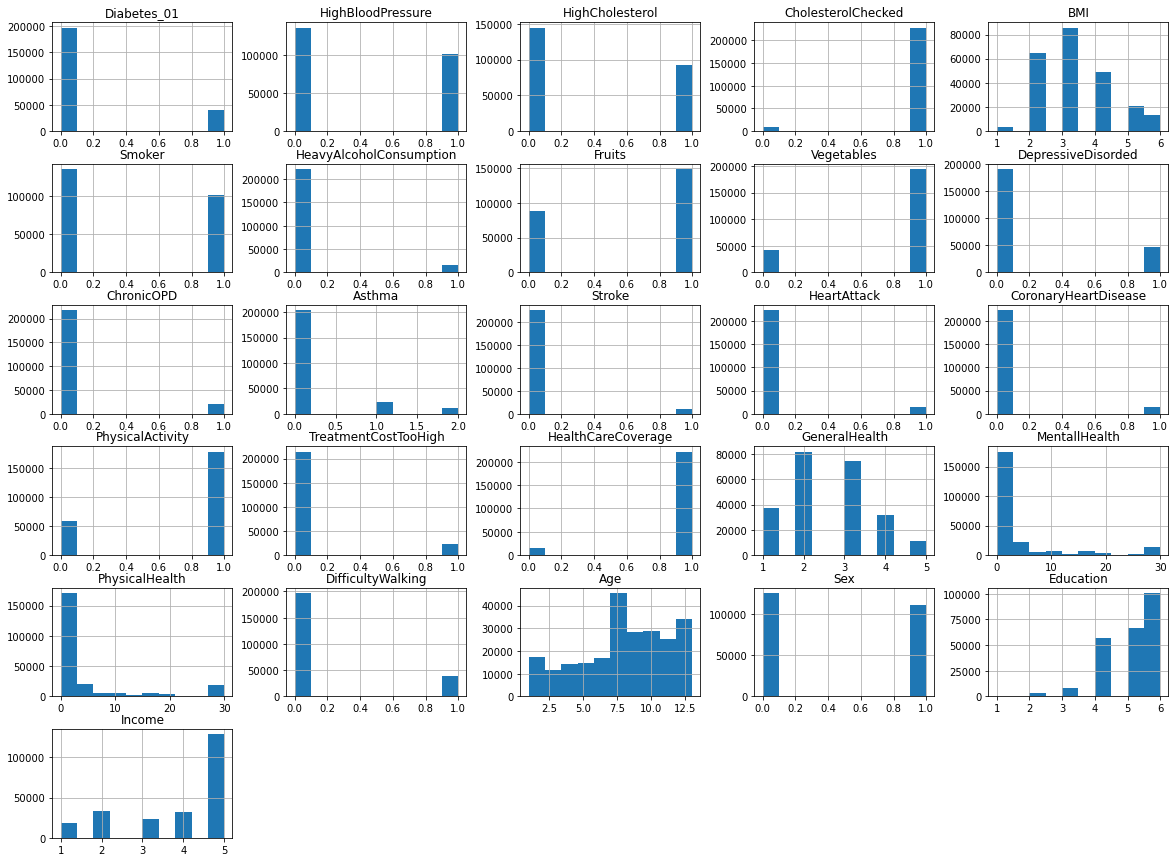

In [71]:
data_binary.hist(figsize=(20,15));

We can see here the value counts of all 26 columns.\
All of columns are discrete columns.\
We can see here the Frequency of values in diffrent columns.

### Correlation between variables

Let's check the correlation between the variables of the data set.

In [72]:
data_binary.corr()

,Diabetes_01,HighBloodPressure,HighCholesterol,CholesterolChecked,BMI,Smoker,HeavyAlcoholConsumption,Fruits,Vegetables,DepressiveDisorded,...,TreatmentCostTooHigh,HealthCareCoverage,GeneralHealth,MentallHealth,PhysicalHealth,DifficultyWalking,Age,Sex,Education,Income
Diabetes_01,1.000000,0.267811,0.213882,0.072270,0.219609,0.054757,-0.062524,-0.028803,-0.042080,0.060477,...,0.022662,0.028093,0.286301,0.055695,0.171840,0.217232,0.200375,0.029819,-0.112178,-0.148499
HighBloodPressure,0.267811,1.000000,0.299660,0.102645,0.216393,0.093491,-0.006361,-0.023159,-0.030438,0.050259,...,-0.004350,0.062913,0.275441,0.035252,0.155838,0.219346,0.348577,0.055449,-0.100431,-0.125621
HighCholesterol,0.213882,0.299660,1.000000,0.097187,0.101831,0.081074,-0.015249,-0.022673,-0.019047,0.081683,...,-0.004382,0.067562,0.189332,0.039846,0.119418,0.141961,0.284916,0.021541,-0.030643,-0.048857
CholesterolChecked,0.072270,0.102645,0.097187,1.000000,0.036776,-0.015223,-0.030260,0.031211,0.017349,0.017845,...,-0.079274,0.150134,0.036057,-0.015722,0.031651,0.045670,0.107726,-0.043373,0.029306,0.022450
BMI,0.219609,0.216393,0.101831,0.036776,1.000000,0.010256,-0.042140,-0.084371,-0.043684,0.098765,...,0.043410,-0.006604,0.241630,0.074770,0.112749,0.184049,-0.026066,0.019799,-0.087905,-0.063741
Smoker,0.054757,0.093491,0.081074,-0.015223,0.010256,1.000000,0.101367,-0.071323,-0.007913,0.100595,...,0.052545,-0.021617,0.165511,0.096039,0.118152,0.117036,0.115846,0.085635,-0.161083,-0.113600
HeavyAlcoholConsumption,-0.062524,-0.006361,-0.015249,-0.030260,-0.042140,0.101367,1.000000,-0.036443,0.016079,0.021139,...,0.014502,-0.023169,-0.026851,0.034904,-0.022066,-0.037222,-0.052590,0.006450,0.016501,0.047353
Fruits,-0.028803,-0.023159,-0.022673,0.031211,-0.084371,-0.071323,-0.036443,1.000000,0.216201,-0.050626,...,-0.040384,0.035579,-0.088682,-0.072313,-0.042215,-0.034336,0.084548,-0.058623,0.092725,0.061432
Vegetables,-0.042080,-0.030438,-0.019047,0.017349,-0.043684,-0.007913,0.016079,0.216201,1.000000,-0.036410,...,-0.030522,0.043438,-0.102849,-0.052692,-0.052714,-0.063309,0.023670,-0.054356,0.130229,0.138592
DepressiveDisorded,0.060477,0.050259,0.081683,0.017845,0.098765,0.100595,0.021139,-0.050626,-0.036410,1.000000,...,0.142555,-0.011033,0.225054,0.421961,0.213286,0.181472,-0.076387,-0.134212,-0.030578,-0.148147


Let's create a heatmap to better understand the correlations in the data set.

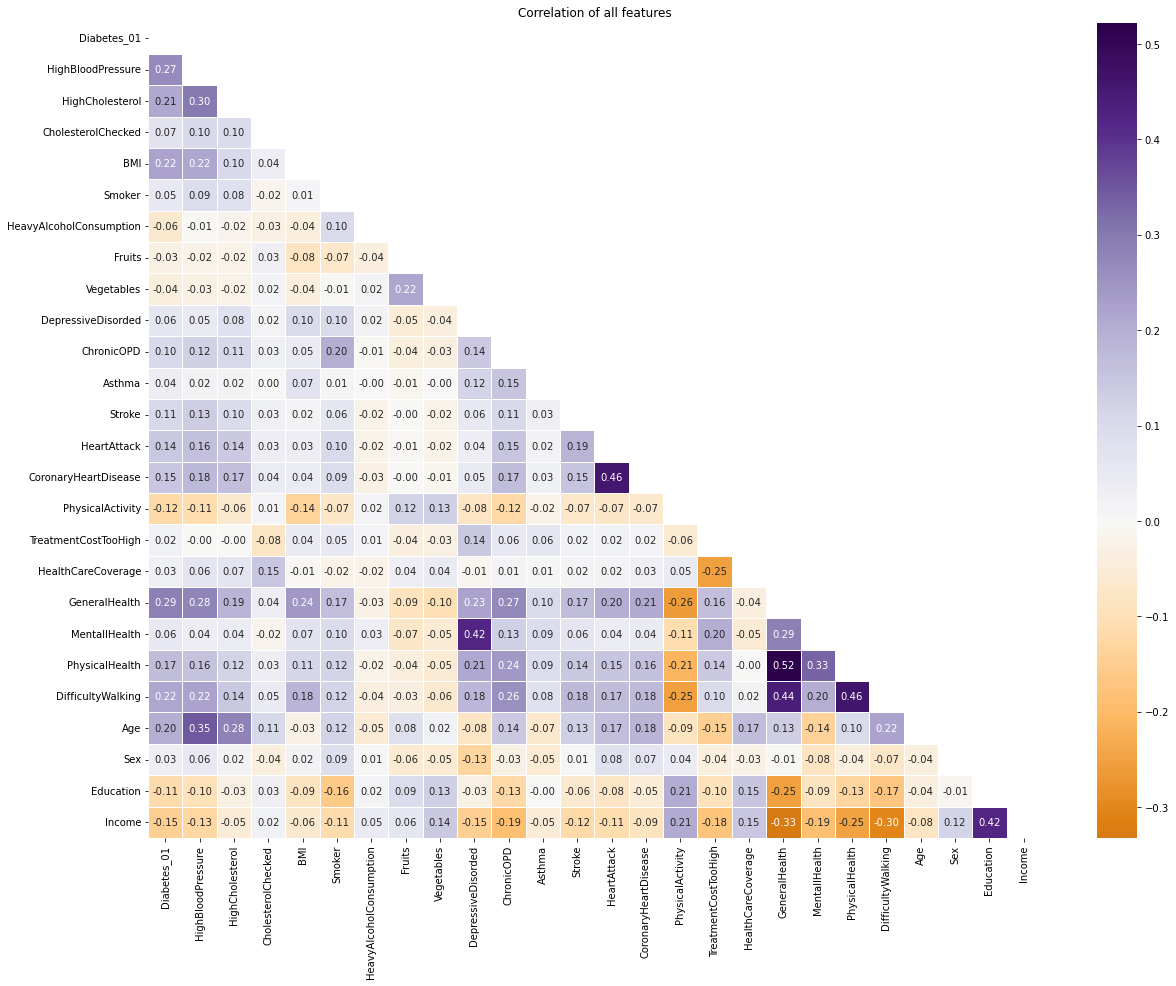

In [73]:
# Creat mask
mask = np.zeros_like(data_binary.corr())
mask[np.triu_indices_from(mask)] = True
# Heatmap of correlation
plt.figure(figsize = (20,15))
sns.heatmap(data_binary.corr(), mask=mask, annot=True, cmap ='PuOr', square=False, linewidths=0.5, fmt=".2f", center=0)
plt.title("Correlation of all features")
plt.show()

Now we can clearly see how and to what extent variables depend on each other.\
We can draw several conclusions:
* High blood pressure depends most strongly on the age of the respondent. The correlation is positive equal to 0.35.
* The occurrence of depressive disorders is related to the number of days in which the patient's mental condition was poor. The correlation is positive equal to 0.42.
* Chronic obstructive pulmonary disease is related to whether a person smokes cigarettes, has difficulty walking up and down stairs, and is not exercising outside of work and earnings. Dinners are around 0.2.
* A person's feelings about their health are related to almost all analyzed factors.
* With age, the risk of high blood pressure and cholesterol increases, and hence the risk of diabetes in this person.
* No surprise when comparing annual earnings and education. The better the education, the more a person earns.
* The big surprise is that alcohol abuse and diet do not significantly affect any of the variables.

#### Correlation with Diabete through bar graph

Let's draw a correlation graph showing the relationship between diabetes and all independent variables.

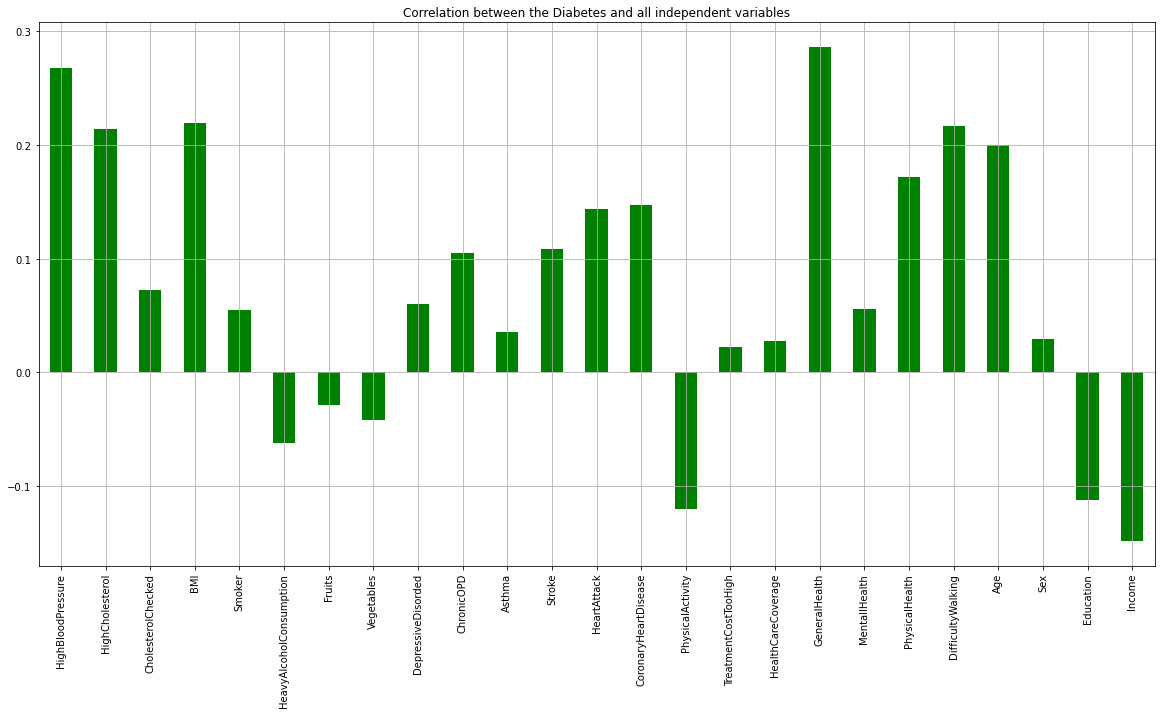

In [74]:
data_binary.drop('Diabetes_01', axis=1).corrwith(data_binary.Diabetes_01).plot(
    kind='bar', grid=True, figsize=(20, 10), 
    title="Correlation between the Diabetes and all independent variables",color="green");

From the graph we can see that:
* The onset of diabetes is most strongly correlated with the development of high blood pressure and cholesterol, higher BMI, difficulty walking with increasing age, and whether a person generally feels weak, which is related to their physical and mental condition.
* Less depends on whether the person has had or has asthma, lung problems, has had a heart attack, is better educated and earns more, the more exercise outside of work is less.
* The impact of a person's gender, diet or having health insurance or excessive alcohol consumption on the occurrence of cyclic disease is negligible.

### Visualization of relationships between variables

In this part, let's present the relationships between variables by creating graphs for them.

First, let's convert binary values into words that will help us build charts.

In [75]:
diabetes = data_binary['Diabetes_01'].replace({0.0:'Healthy', 1.0:'Pre-diabetic or Diabetic'})
highbloodpres = data_binary['HighBloodPressure'].replace({0.0:'Not high', 1.0:'High'})
highcholesterol = data_binary['HighCholesterol'].replace({0.0:'Lack of awareness', 1.0:'Awareness'})
cholesterolchecked = data_binary['CholesterolChecked'].replace({0.0:'Not checked', 1.0:'Checked'})
bmi = pd.Series.sort_values(data_binary['BMI'].replace({1.0:'Underweight', 2.0:'Normal Weight', 
                                                        3.0:'Overweight', 4.0:'Obesity I degree', 
                                                        5.0:'Obesity II degree', 6.0:'Obesity III degree'}))
smoker = data_binary['Smoker'].replace({0.0:'No', 1.0:'Yes'})
alcohol = data_binary['HeavyAlcoholConsumption'].replace({0.0:'No', 1.0:'Yes'})
fruits = data_binary['Fruits'].replace({0.0:'Less than 1 time per day', 
                                        1.0:'1 or more times per day'})
veggies = data_binary['Vegetables'].replace({0.0:'Less than 1 time per day', 
                                             1.0:'1 or more times per day'})
depressive = data_binary['DepressiveDisorded'].replace({0.0:'No', 1.0:'Yes'})
copd = data_binary['ChronicOPD'].replace({0.0:'No', 1.0:'Yes'})
asthma = pd.Series.sort_values(data_binary['Asthma'].replace({0.0:'Never', 1.0:'Current', 2.0:'Former'}))
stroke = data_binary['Stroke'].replace({0.0:'No', 1.0:'Yes'})
heartattack = data_binary['HeartAttack'].replace({0.0:'No', 1.0:'Yes'})
coronaryheart = data_binary['CoronaryHeartDisease'].replace({0.0:'No', 1.0:'Yes'})
activity = data_binary['PhysicalActivity'].replace({0.0:'No physical activity or exercise', 
                                                    1.0:'Had physical activity or exercise'})
costtoohigh = data_binary['TreatmentCostTooHigh'].replace({0.0:'No', 1.0:'Yes'})
carecoverage = data_binary['HealthCareCoverage'].replace({0.0:'No', 1.0:'Yes'})
generalhealth = pd.Series.sort_values(data_binary['GeneralHealth'].replace({1.0:'Excellent', 2.0:'Very good', 
                                                                            3.0:'Good', 4.0:'Fair', 5.0:'Poor'}))
diffiwalk = data_binary['DifficultyWalking'].replace({0.0:'No', 1.0:'Yes'})
age = pd.Series.sort_values(data_binary['Age'].replace({1.0:'18 to 24', 2.0:'25 to 29', 3.0:'30 to 34', 4.0:'35 to 39',
                                  5.0:'40 to 44', 6.0:'45 to 49', 7.0:'50 to 54', 8.0:'55 to 59',
                                  9.0:'60 to 64', 10.0:'65 to 69', 11.0:'70 to 74', 12.0:'75 to 79',
                                  13.0:'80 or older'}))
sex = data_binary['Sex'].replace({0.0:'Female', 1.0:'Male'})
education = pd.Series.sort_values(data_binary['Education'].replace({1.0:'Never attended school', 2.0:'Elementary school', 
                                                                    3.0:'Some high school', 4.0:'High school graduate', 
                                                                    5.0:'Some college or technical school', 
                                                                    6.0:'College graduate'}))
income = pd.Series.sort_values(data_binary['Income'].replace({1.0:'Less than 15,000', 2.0:'15,000 to 25,000', 
                                                              3.0:'25,000 to 35,000', 4.0:'35,000 to 50,000',
                                                              5.0:'50,000 or more'}))

#### Relationship between High Blood Pressure and Diabetes

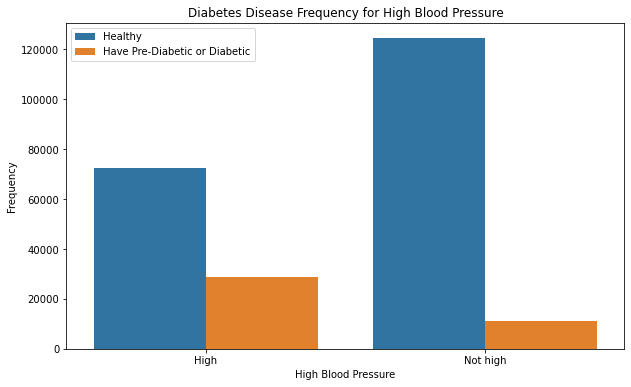

In [76]:
plt.figure(figsize=(10,6))
sns.countplot(x=highbloodpres, data=data_binary, hue='Diabetes_01')
plt.title('Diabetes Disease Frequency for High Blood Pressure')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('High Blood Pressure')
plt.show()

In [77]:
highbloodpres_df = pd.crosstab(diabetes, highbloodpres, rownames=['Diabetes'], colnames=['High Blood Pressure'])
highbloodpres_df['High [%]'] = round((highbloodpres_df['High'] / highbloodpres_df['High'].sum()) * 100,1)
highbloodpres_df['Not high [%]'] = round((highbloodpres_df['Not high'] /  highbloodpres_df['Not high'].sum()) * 100,1)
highbloodpres_df

High Blood Pressure,High,Not high,High [%],Not high [%]
Diabetes,,,,
Healthy,72468,124539,71.5,91.8
Pre-diabetic or Diabetic,28873,11143,28.5,8.2


We see that people who had high blood pressure had diabetes much more often, almost 30%. In contrast, only 8% of people without high blood pressure had pre-diabetes or diabetes. This is also confirmed by one of the largest positive correlations of all independent variables.

#### Relationship between Hight Blood Pressure and Age

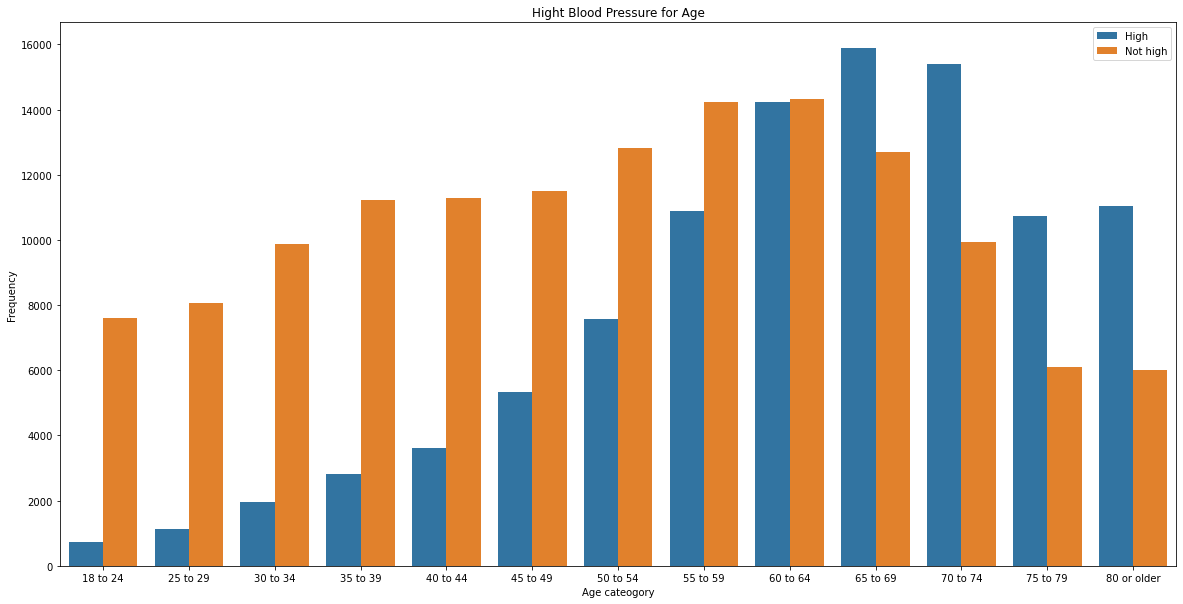

In [78]:
plt.figure(figsize=(20,10))
sns.countplot(x=age, data=data_binary, hue=highbloodpres)
plt.title('Hight Blood Pressure for Age')
plt.legend(["High", "Not high"])
plt.ylabel('Frequency')
plt.xlabel('Age cateogory')
plt.show()

In [79]:
highbloodpres_df = pd.crosstab(age, highbloodpres, rownames=['Age category'], colnames=['Hight Blood Pressure'])
highbloodpres_df['High [%]'] = round((highbloodpres_df['High'] / highbloodpres_df['High'].sum()) * 100,1)
highbloodpres_df['Not high [%]'] = round((highbloodpres_df['Not high'] / highbloodpres_df['Not high'].sum()) * 100,1)
highbloodpres_df

Hight Blood Pressure,High,Not high,High [%],Not high [%]
Age category,,,,
18 to 24,723,7606,0.7,5.6
25 to 29,1131,8074,1.1,6.0
30 to 34,1954,9869,1.9,7.3
35 to 39,2822,11238,2.8,8.3
40 to 44,3628,11272,3.6,8.3
45 to 49,5326,11488,5.3,8.5
50 to 54,7578,12826,7.5,9.5
55 to 59,10896,14234,10.8,10.5
60 to 64,14227,14335,14.0,10.6


We can see that as age increases, more and more people are diagnosed with high blood pressure.
The chart shows that every second person aged 60-65 has high blood pressure. People with high blood pressure over the age of 75 are already twice as many as without high blood pressure.\
The youngest, aged 18 to around 40, are least exposed to the risk of high blood pressure.

#### Relationship between BMI and Diabetes

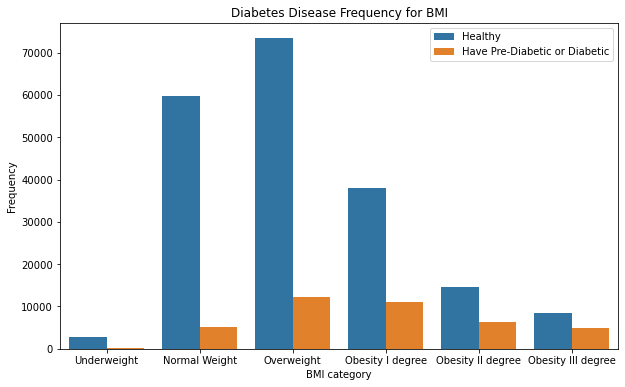

In [80]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='BMI', data=data_binary, hue=diabetes)
ax.set(xticklabels = (['Underweight', 'Normal Weight', 'Overweight', 'Obesity I degree', 
                       'Obesity II degree', 'Obesity III degree']))
plt.title('Diabetes Disease Frequency for BMI')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('BMI category')
plt.show()

In [81]:
bmi_df = pd.crosstab(bmi, diabetes, rownames=['BMI category'], colnames=['Diabetes'])
bmi_df['Healthy [%]'] = round((bmi_df['Healthy'] / bmi_df['Healthy'].sum()) * 100,1)
bmi_df['Pre-diabetic or Diabetic [%]'] = round((bmi_df['Pre-diabetic or Diabetic'] / 
                                                bmi_df['Pre-diabetic or Diabetic'].sum()) * 100,1)
bmi_df

Diabetes,Healthy,Pre-diabetic or Diabetic,Healthy [%],Pre-diabetic or Diabetic [%]
BMI category,,,,
Normal Weight,59842,5215,30.4,13.0
Obesity I degree,37923,11136,19.2,27.8
Obesity II degree,14612,6244,7.4,15.6
Obesity III degree,8418,4840,4.3,12.1
Overweight,73408,12356,37.3,30.9
Underweight,2804,225,1.4,0.6


We can see that the proportion of nondiabetic people to those with pre-dia- betic or cyclical disease is changing to a disadvantageous level for obese people. People with a BMI below the normal level or with a normal level are several times less sick than healthy ones. People who are very obese (Obesity III degree) are at high risk of developing diabetes. In our dataset, that's over 1/3 of all respondents with this BMI level.

#### Relationship between Smoker and Diabetes

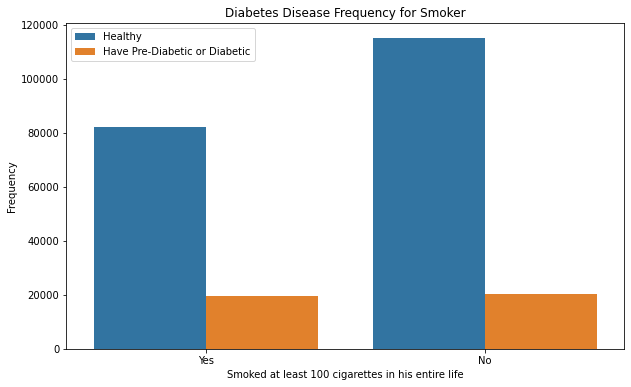

In [82]:
plt.figure(figsize=(10,6))
sns.countplot(x=smoker, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for Smoker')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Smoked at least 100 cigarettes in his entire life')
plt.show()

In [83]:
smoker_df = pd.crosstab(diabetes, smoker, rownames=['Diabetes'], colnames=['Smoked at least 100 cigarettes'])
smoker_df['No [%]'] = round((smoker_df['No'] / smoker_df['No'].sum()) * 100,1)
smoker_df['Yes [%]'] = round((smoker_df['Yes'] / smoker_df['Yes'].sum()) * 100,1)
smoker_df

Smoked at least 100 cigarettes,No,Yes,No [%],Yes [%]
Diabetes,,,,
Healthy,114951,82056,84.9,80.7
Pre-diabetic or Diabetic,20454,19562,15.1,19.3


We can see that smoking has little effect on increasing the number of people suffering from diabetes among the respondents.
A similar percentage of smokers and non-smokers is non-diabetic. The difference is only 5%.

#### Relationship between Heavy drinkers and Diabetes

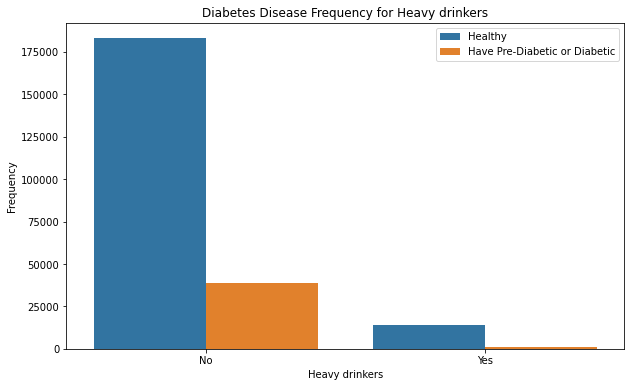

In [84]:
plt.figure(figsize=(10,6))
sns.countplot(x=alcohol, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for Heavy drinkers')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Heavy drinkers')
plt.show()

In [85]:
fruits_df = pd.crosstab(diabetes, alcohol, rownames=['Diabetes'], colnames=['Heavy Alcohol Consumption'])
fruits_df['No [%]'] = round((fruits_df['No'] / fruits_df['No'].sum()) * 100,1)
fruits_df['Yes [%]'] = round((fruits_df['Yes'] / fruits_df['Yes'].sum()) * 100,1)
fruits_df

Heavy Alcohol Consumption,No,Yes,No [%],Yes [%]
Diabetes,,,,
Healthy,183090,13917,82.5,92.1
Pre-diabetic or Diabetic,38821,1195,17.5,7.9


We can see that excessive alcohol consumption does not affect the development of the disease. This is one of the most striking dependencies.

#### Relationship between Respondent's diet and Diabetes

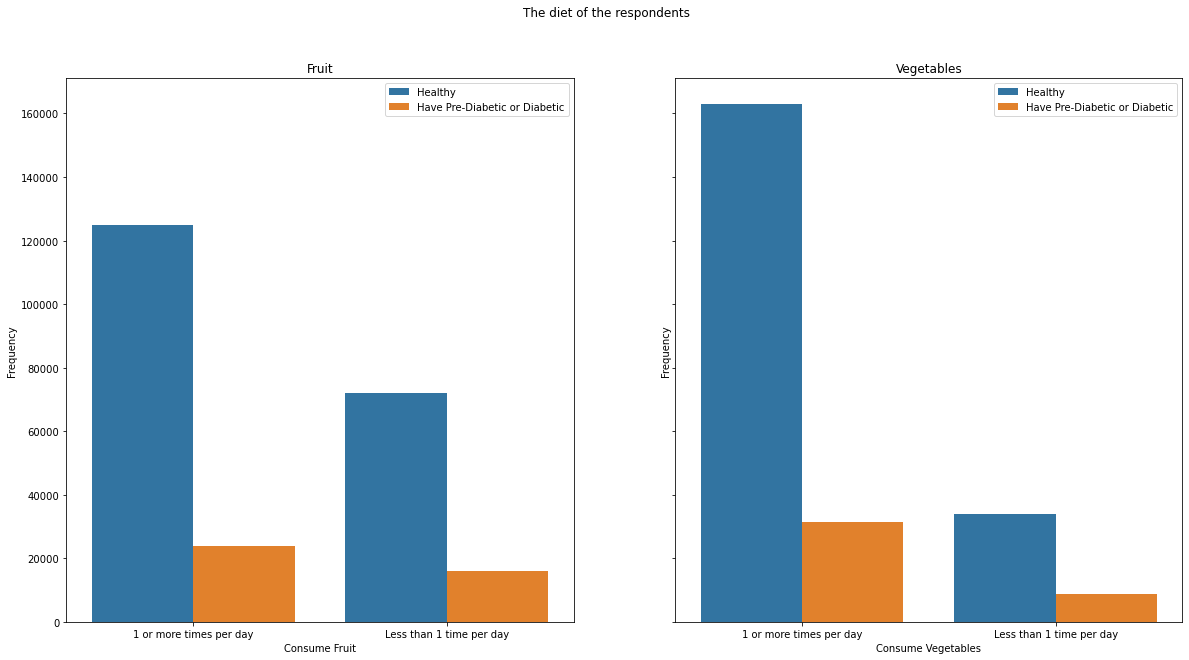

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
fig.suptitle('The diet of the respondents')

sns.countplot(ax=axes[0], x=fruits, data=data_binary, hue=diabetes)
axes[0].set_title('Fruit')
axes[0].legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Consume Fruit')

sns.countplot(ax=axes[1], x=veggies, data=data_binary, hue=diabetes)
axes[1].set_title('Vegetables')
axes[1].legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('Consume Vegetables')

plt.show()

In [87]:
fruits_df = pd.crosstab(diabetes, fruits, rownames=['Diabetes'], colnames=['Consume Fruit'])
fruits_df['1 or more times per day [%]'] = round((fruits_df['1 or more times per day'] /
                                                   fruits_df['1 or more times per day'].sum()) * 100,1)
fruits_df['Less than 1 time per day [%]'] = round((fruits_df['Less than 1 time per day'] /
                                                    fruits_df['Less than 1 time per day'].sum()) * 100,1)
fruits_df

Consume Fruit,1 or more times per day,Less than 1 time per day,1 or more times per day [%],Less than 1 time per day [%]
Diabetes,,,,
Healthy,124865,72142,83.9,81.7
Pre-diabetic or Diabetic,23875,16141,16.1,18.3


In [88]:
veggies_df = pd.crosstab(diabetes, veggies, rownames=['Diabetes'], colnames=['Consume Vegetables'])
veggies_df['1 or more times per day [%]'] = round((veggies_df['1 or more times per day'] /
                                                   veggies_df['1 or more times per day'].sum()) * 100,1)
veggies_df['Less than 1 time per day [%]'] = round((veggies_df['Less than 1 time per day'] /
                                                    veggies_df['Less than 1 time per day'].sum()) * 100,1)
veggies_df

Consume Vegetables,1 or more times per day,Less than 1 time per day,1 or more times per day [%],Less than 1 time per day [%]
Diabetes,,,,
Healthy,162960,34047,83.9,79.8
Pre-diabetic or Diabetic,31373,8643,16.1,20.2


We can see that the consumption of fruit and vegetables by the respondents also does not affect diabetes.
The differences are very small, just a few percent.

#### Relationship between Depressive Disorder and Diabetes

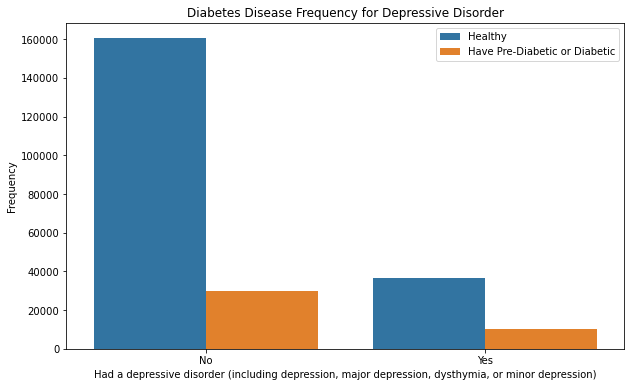

In [89]:
plt.figure(figsize=(10,6))
sns.countplot(x=depressive, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for Depressive Disorder')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Had a depressive disorder (including depression, major depression, dysthymia, or minor depression)')
plt.show()

In [90]:
depressive_df = pd.crosstab(diabetes, depressive, rownames=['Diabetes'], colnames=['Depressive Disorded'])
depressive_df['No [%]'] = round((depressive_df['No'] / depressive_df['No'].sum()) * 100,1)
depressive_df['Yes [%]'] = round((depressive_df['Yes'] / depressive_df['Yes'].sum()) * 100,1)
depressive_df

Depressive Disorded,No,Yes,No [%],Yes [%]
Diabetes,,,,
Healthy,160524,36483,84.2,78.5
Pre-diabetic or Diabetic,30041,9975,15.8,21.5


We see that the appearance of a depressive disorder, including depression, major depression, dysthymia or mild depression, has little effect on the number of diabetics.

#### Relationship between Chronic Obstructive Pulmonary Disease (C.O.P.D.) and Diabetes

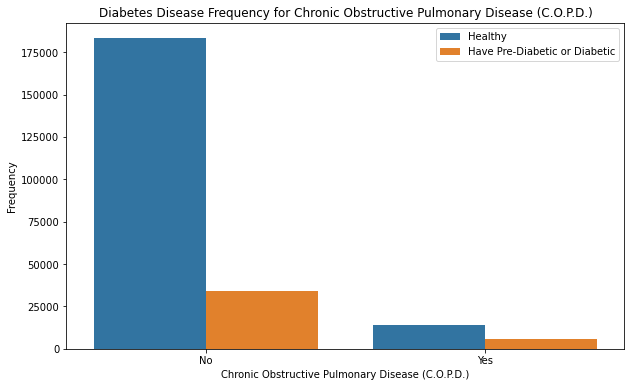

In [91]:
plt.figure(figsize=(10,6))
sns.countplot(x=copd, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for Chronic Obstructive Pulmonary Disease (C.O.P.D.)')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Chronic Obstructive Pulmonary Disease (C.O.P.D.)')
plt.show()

In [92]:
copd_df = pd.crosstab(diabetes, copd, rownames=['Diabetes'], colnames=['C.O.P.D.'])
copd_df['No [%]'] = round((copd_df['No'] / copd_df['No'].sum()) * 100,1)
copd_df['Yes [%]'] = round((copd_df['Yes'] / copd_df['Yes'].sum()) * 100,1)
copd_df

C.O.P.D.,No,Yes,No [%],Yes [%]
Diabetes,,,,
Healthy,183253,13754,84.3,70.1
Pre-diabetic or Diabetic,34141,5875,15.7,29.9


We can see that the onset of chronic obstructive pulmonary disease in the respondent increases the risk of developing chicosis. 30% of people suffering from this disease have diabetes or pre-diabetes. Compared to people without lung disease, which is 15 percentage points less.

#### Relationship between Asthma and Diabetes

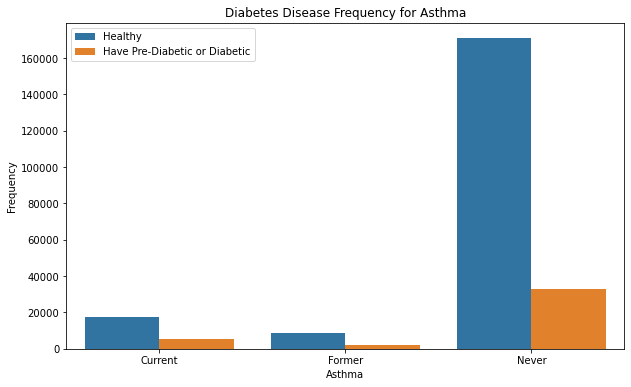

In [93]:
plt.figure(figsize=(10,6))
sns.countplot(x=asthma, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for Asthma')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Asthma')
plt.show()

In [94]:
asthma_df = pd.crosstab(asthma, diabetes, rownames=['Asthma'], colnames=['Diabetes'])
asthma_df['Healthy [%]'] = round((asthma_df['Healthy'] / asthma_df['Healthy'].sum()) * 100,1)
asthma_df['Pre-diabetic or Diabetic [%]'] = round((asthma_df['Pre-diabetic or Diabetic'] / 
                                                   asthma_df['Pre-diabetic or Diabetic'].sum()) * 100,1)
asthma_df

Diabetes,Healthy,Pre-diabetic or Diabetic,Healthy [%],Pre-diabetic or Diabetic [%]
Asthma,,,,
Current,17367,5220,8.8,13.0
Former,8631,1828,4.4,4.6
Never,171009,32968,86.8,82.4


We can see that our dataset includes a small number of people who previously had or currently have asthma. Nevertheless, we can see that the percentage of people with diabetes currently having aspma is slightly higher.

#### Relationship between Stroke and Diabetes

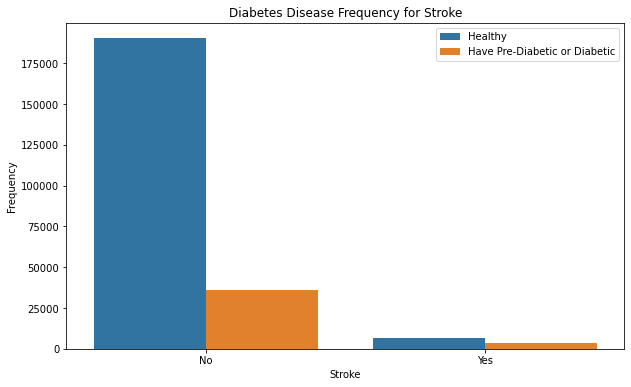

In [95]:
plt.figure(figsize=(10,6))
sns.countplot(x=stroke, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for Stroke')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Stroke')
plt.show()

In [96]:
stroke_df = pd.crosstab(diabetes, stroke, rownames=['Diabetes'], colnames=['Stroke'])
stroke_df['No [%]'] = round((stroke_df['No'] / stroke_df['No'].sum()) * 100,1)
stroke_df['Yes [%]'] = round((stroke_df['Yes'] / stroke_df['Yes'].sum()) * 100,1)
stroke_df

Stroke,No,Yes,No [%],Yes [%]
Diabetes,,,,
Healthy,190411,6596,84.0,64.0
Pre-diabetic or Diabetic,36304,3712,16.0,36.0


We see that as many as 1/3 of people who have a stroke are diagnosed with pre-diabetes or diabetes. For people without a stroke, this percentage is half that. This may be because our collection includes a very small number of people who have had a stroke.

#### Relationship between Heart Attack and Diabetes

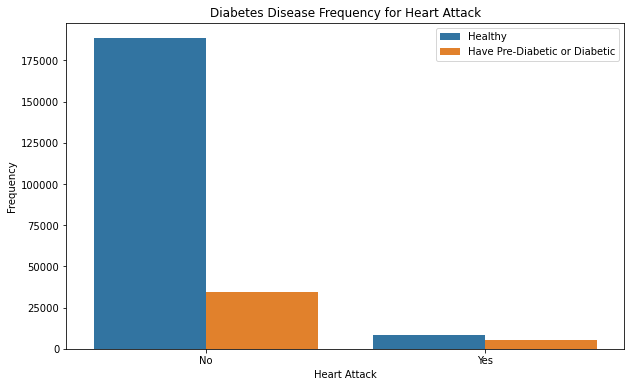

In [97]:
plt.figure(figsize=(10,6))
sns.countplot(x=heartattack, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for Heart Attack')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Heart Attack')
plt.show()

In [98]:
heartattack_df = pd.crosstab(diabetes, heartattack, rownames=['Diabetes'], colnames=['Heart Attack'])
heartattack_df['No [%]'] = round((heartattack_df['No'] / heartattack_df['No'].sum()) * 100,1)
heartattack_df['Yes [%]'] = round((heartattack_df['Yes'] / heartattack_df['Yes'].sum()) * 100,1)
heartattack_df

Heart Attack,No,Yes,No [%],Yes [%]
Diabetes,,,,
Healthy,188429,8578,84.5,61.6
Pre-diabetic or Diabetic,34658,5358,15.5,38.4


We can see that the case of a heart attack is very similar to a stroke.
Almost 40% of people who have had a heart attack are diagnosed with prediabetes or diabetes. In the case of people without a heart attack, the percentage is 15%. It may also be because our collection includes a very small number of people who have had a stroke.

#### Relationship between Coronary Heart Disease and Diabetes

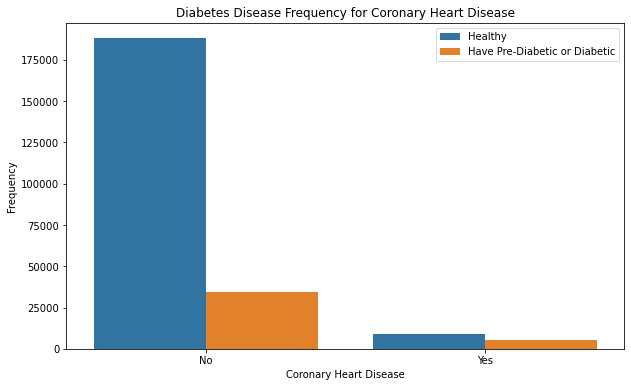

In [99]:
plt.figure(figsize=(10,6))
sns.countplot(x=coronaryheart, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for Coronary Heart Disease')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Coronary Heart Disease')
plt.show()

In [100]:
coronaryheart_df = pd.crosstab(diabetes, coronaryheart, rownames=['Diabetes'], colnames=['Coronary Heart Disease'])
coronaryheart_df['No [%]'] = round((coronaryheart_df['No'] / coronaryheart_df['No'].sum()) * 100,1)
coronaryheart_df['Yes [%]'] = round((coronaryheart_df['Yes'] / coronaryheart_df['Yes'].sum()) * 100,1)
coronaryheart_df

Coronary Heart Disease,No,Yes,No [%],Yes [%]
Diabetes,,,,
Healthy,188123,8884,84.5,61.5
Pre-diabetic or Diabetic,34450,5566,15.5,38.5


We see that in the case of angina or coronary heart disease the situation is analogous to that of the heart attack variable.

#### Relationship between Physical Activity and Diabetes

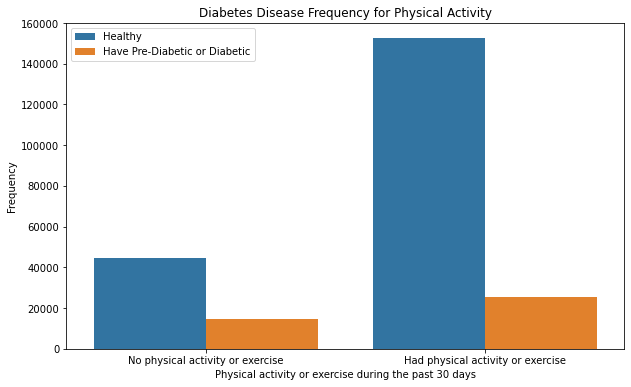

In [101]:
plt.figure(figsize=(10,6))
sns.countplot(x=activity, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for Physical Activity')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Physical activity or exercise during the past 30 days')
plt.show()

In [102]:
activity_df = pd.crosstab(diabetes, activity, rownames=['Diabetes'], colnames=['Physical activity'])
activity_df['Had physical activity or exercise [%]'] = round((activity_df['Had physical activity or exercise'] / 
                                                              activity_df['Had physical activity or exercise'].sum()) * 100,1)
activity_df['No physical activity or exercise [%]'] = round((activity_df['No physical activity or exercise'] / 
                                activity_df['No physical activity or exercise'].sum()) * 100,1)
activity_df

Physical activity,Had physical activity or exercise,No physical activity or exercise,Had physical activity or exercise [%],No physical activity or exercise [%]
Diabetes,,,,
Healthy,152548,44459,85.7,75.3
Pre-diabetic or Diabetic,25440,14576,14.3,24.7


We can see that as many as every fourth person who does not play sports or does not exercise, is at risk of developing diabetes. Only 15% of people who practice any sport at least once a month are diabetic.

#### Relationship between General Health and Diabetes

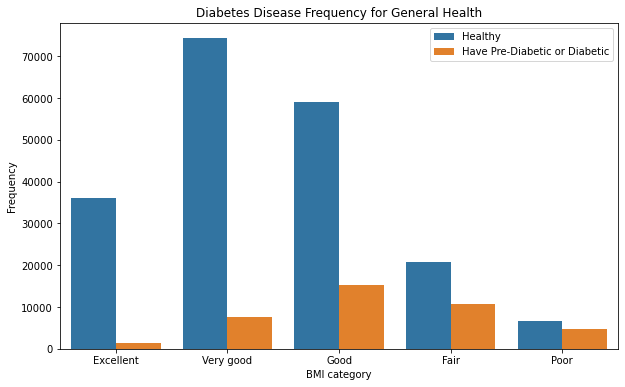

In [103]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='GeneralHealth', data=data_binary, hue=diabetes)
ax.set(xticklabels = (['Excellent', 'Very good', 'Good', 'Fair', 'Poor']))
plt.title('Diabetes Disease Frequency for General Health')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('BMI category')
plt.show()

In [104]:
generalhealth_df = pd.crosstab(generalhealth, diabetes, rownames=['General Health'], colnames=['Diabetes'])
generalhealth_df['Healthy [%]'] = round((generalhealth_df['Healthy'] / generalhealth_df['Healthy'].sum()) * 100,1)
generalhealth_df['Pre-diabetic or Diabetic [%]'] = round((generalhealth_df['Pre-diabetic or Diabetic'] / 
                                                          generalhealth_df['Pre-diabetic or Diabetic'].sum()) * 100,1)
generalhealth_df

Diabetes,Healthy,Pre-diabetic or Diabetic,Healthy [%],Pre-diabetic or Diabetic [%]
General Health,,,,
Excellent,36127,1500,18.3,3.7
Fair,20770,10823,10.5,27.0
Good,59124,15352,30.0,38.4
Poor,6679,4668,3.4,11.7
Very good,74307,7673,37.7,19.2


We can see that as many as every fourth person who does not play sports or does not exercise, is at risk of developing diabetes. Only 15% of people who practice any sport at least once a month are diabetic. We can easily see that people who define their health as great have little to no diabetes. On the other hand, people who assess their health as worse than good, suffer from diabetes in more than half of those who are free from diabetes.

#### Relationship between Difficulty Walking and Diabetes

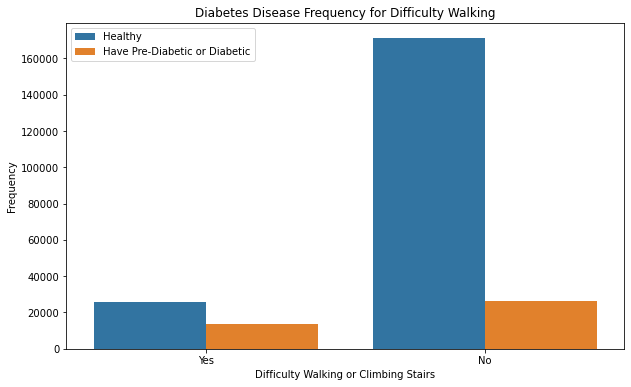

In [105]:
plt.figure(figsize=(10,6))
sns.countplot(x=diffiwalk, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for Difficulty Walking')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Difficulty Walking or Climbing Stairs')
plt.show()

In [106]:
diffiwalk_df = pd.crosstab(diabetes, diffiwalk, rownames=['Diabetes'], colnames=['Difficulty Walking'])
diffiwalk_df['No [%]'] = round((diffiwalk_df['No'] / diffiwalk_df['No'].sum()) * 100,1)
diffiwalk_df['Yes [%]'] = round((diffiwalk_df['Yes'] / diffiwalk_df['Yes'].sum()) * 100,1)
diffiwalk_df

Difficulty Walking,No,Yes,No [%],Yes [%]
Diabetes,,,,
Healthy,171120,25887,86.8,65.0
Pre-diabetic or Diabetic,26082,13934,13.2,35.0


We see that difficulty in walking or climbing stairs is highly correlated with having diabetes. Over 35% of people who have difficulty walking are diagnosed with diabetes or diabetes. However, among people without these difficulties, only about 10% of people with diabetes are affected.

#### Relationship between Sex and Diabetes

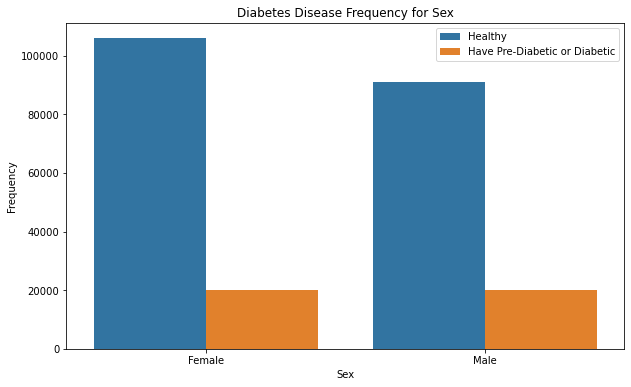

In [107]:
plt.figure(figsize=(10,6))
sns.countplot(x=sex, data=data_binary, hue='Diabetes_01')
plt.title('Diabetes Disease Frequency for Sex')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.show()

In [108]:
sex_df = pd.crosstab(diabetes, sex, rownames=['Diabetes'], colnames=['Sex'])
sex_df['Female [%]'] = round((sex_df['Female'] / sex_df['Female'].sum()) * 100,1)
sex_df['Male [%]'] = round((sex_df['Male'] / sex_df['Male'].sum()) * 100,1)
sex_df

Sex,Female,Male,Female [%],Male [%]
Diabetes,,,,
Healthy,105970,91037,84.2,81.9
Pre-diabetic or Diabetic,19935,20081,15.8,18.1


From the chart, we can read that gender has a slight influence on diabetes. It is true that men are more dependent, but the difference compared to women is minimal and negligible.

#### Relationship between Age and Diabetes

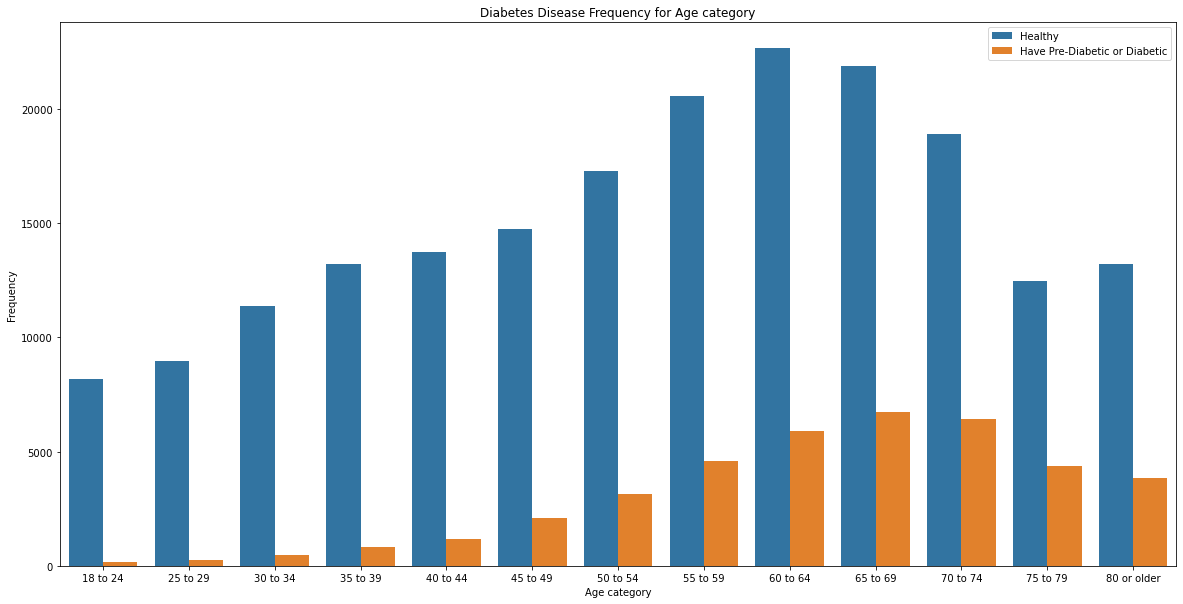

In [109]:
plt.figure(figsize=(20,10))
sns.countplot(x=age, data=data_binary, hue='Diabetes_01')
plt.title('Diabetes Disease Frequency for Age category')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Age category')
plt.show()

In [110]:
age_df = pd.crosstab(age, diabetes, rownames=['Age category'], colnames=['Diabetes'])
age_df['Healthy [%]'] = round((age_df['Healthy'] / age_df['Healthy'].sum()) * 100,1)
age_df['Pre-diabetic or Diabetic [%]'] = round((age_df['Pre-diabetic or Diabetic'] /
                                                age_df['Pre-diabetic or Diabetic'].sum()) * 100,1)
age_df

Diabetes,Healthy,Pre-diabetic or Diabetic,Healthy [%],Pre-diabetic or Diabetic [%]
Age category,,,,
18 to 24,8158,171,4.1,0.4
25 to 29,8944,261,4.5,0.7
30 to 34,11359,464,5.8,1.2
35 to 39,13217,843,6.7,2.1
40 to 44,13712,1188,7.0,3.0
45 to 49,14722,2092,7.5,5.2
50 to 54,17276,3128,8.8,7.8
55 to 59,20551,4579,10.4,11.4
60 to 64,22648,5914,11.5,14.8


We can see that age has a significant impact on whether or not a person develops diabetes or is at increased risk of developing it.\
We can read that almost 80% of all diabetics are people over 55 years of age.\
Sick people between the ages of 30 and 55 make up not all of 20%.\
However, among people under 30 years of age, only 1% of people with diabetes in our data are.

#### Relationship between Age, Sex and Diabetes

In [111]:
age_male_0 = pd.Series.sort_values(data_binary.query('Diabetes_01 == 0 & Sex == 1')['Age'].replace({1.0:'18 to 24', 2.0:'25 to 29', 3.0:'30 to 34', 4.0:'35 to 39',
                                  5.0:'40 to 44', 6.0:'45 to 49', 7.0:'50 to 54', 8.0:'55 to 59',
                                  9.0:'60 to 64', 10.0:'65 to 69', 11.0:'70 to 74', 12.0:'75 to 79',
                                  13.0:'80 or older'}))
age_male_1 = pd.Series.sort_values(data_binary.query('Diabetes_01 == 1 & Sex == 1')['Age'].replace({1.0:'18 to 24', 2.0:'25 to 29', 3.0:'30 to 34', 4.0:'35 to 39',
                                  5.0:'40 to 44', 6.0:'45 to 49', 7.0:'50 to 54', 8.0:'55 to 59',
                                  9.0:'60 to 64', 10.0:'65 to 69', 11.0:'70 to 74', 12.0:'75 to 79',
                                  13.0:'80 or older'}))
age_female_0 = pd.Series.sort_values(data_binary.query('Diabetes_01 == 0 & Sex == 0')['Age'].replace({1.0:'18 to 24', 2.0:'25 to 29', 3.0:'30 to 34', 4.0:'35 to 39',
                                  5.0:'40 to 44', 6.0:'45 to 49', 7.0:'50 to 54', 8.0:'55 to 59',
                                  9.0:'60 to 64', 10.0:'65 to 69', 11.0:'70 to 74', 12.0:'75 to 79',
                                  13.0:'80 or older'}))
age_female_1 = pd.Series.sort_values(data_binary.query('Diabetes_01 == 1 & Sex == 0')['Age'].replace({1.0:'18 to 24', 2.0:'25 to 29', 3.0:'30 to 34', 4.0:'35 to 39',
                                  5.0:'40 to 44', 6.0:'45 to 49', 7.0:'50 to 54', 8.0:'55 to 59',
                                  9.0:'60 to 64', 10.0:'65 to 69', 11.0:'70 to 74', 12.0:'75 to 79',
                                  13.0:'80 or older'}))

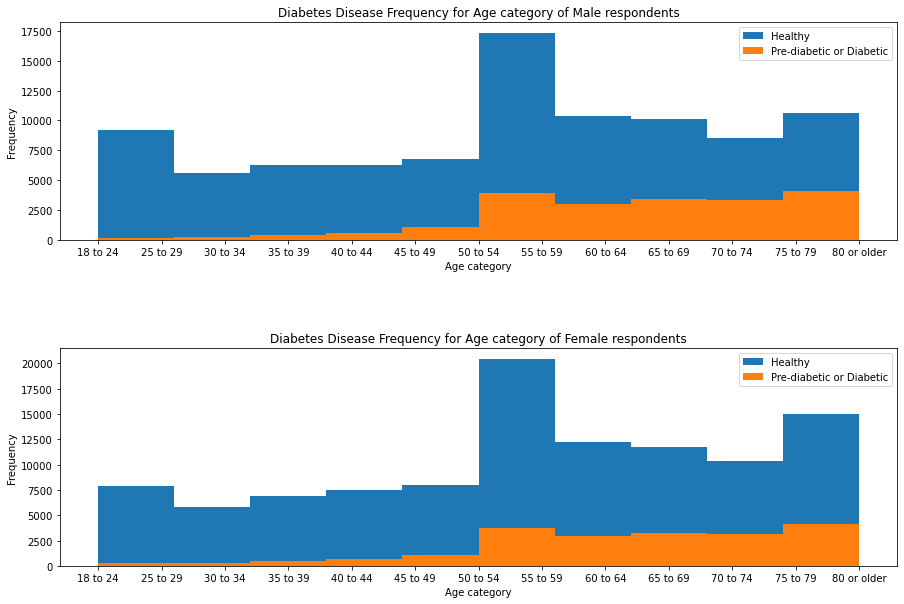

In [112]:
plt.figure(figsize = (15,10))

plt.subplot(2,1,1)   
plt.hist(age_male_0, label = 'Healthy')
plt.hist(age_male_1, label = 'Pre-diabetic or Diabetic')
plt.legend()
plt.xlabel("Age category")
plt.ylabel("Frequency")
plt.title('Diabetes Disease Frequency for Age category of Male respondents')

plt.subplot(2,1,2)
plt.hist(age_female_0, label = 'Healthy')
plt.hist(age_female_1, label = 'Pre-diabetic or Diabetic')
plt.legend()
plt.xlabel("Age category")
plt.ylabel("Frequency")
plt.title('Diabetes Disease Frequency for Age category of Female respondents')

plt.subplots_adjust(hspace = 0.5)
plt.show()

In [113]:
pd.DataFrame(data_binary.groupby([age, sex]).count()['Diabetes_01'])

Diabetes_01
Age         Sex                
18 to 24    Female         3711
            Male           4618
25 to 29    Female         4457
            Male           4748
30 to 34    Female         6029
            Male           5794
35 to 39    Female         7386
            Male           6674
40 to 44    Female         8111
            Male           6789
45 to 49    Female         9043
            Male           7771
50 to 54    Female        10839
            Male           9565
55 to 59    Female        13397
            Male          11733
60 to 64    Female        15167
            Male          13395
65 to 69    Female        15061
            Male          13532
70 to 74    Female        13490
            Male          11821
75 to 79    Female         9246
            Male           7582
80 or older Female         9968
            Male           7096

We can see that age by gender shows us again that both men and women have an equal risk of developing diabetes.

#### Relationship between Education and Diabetes

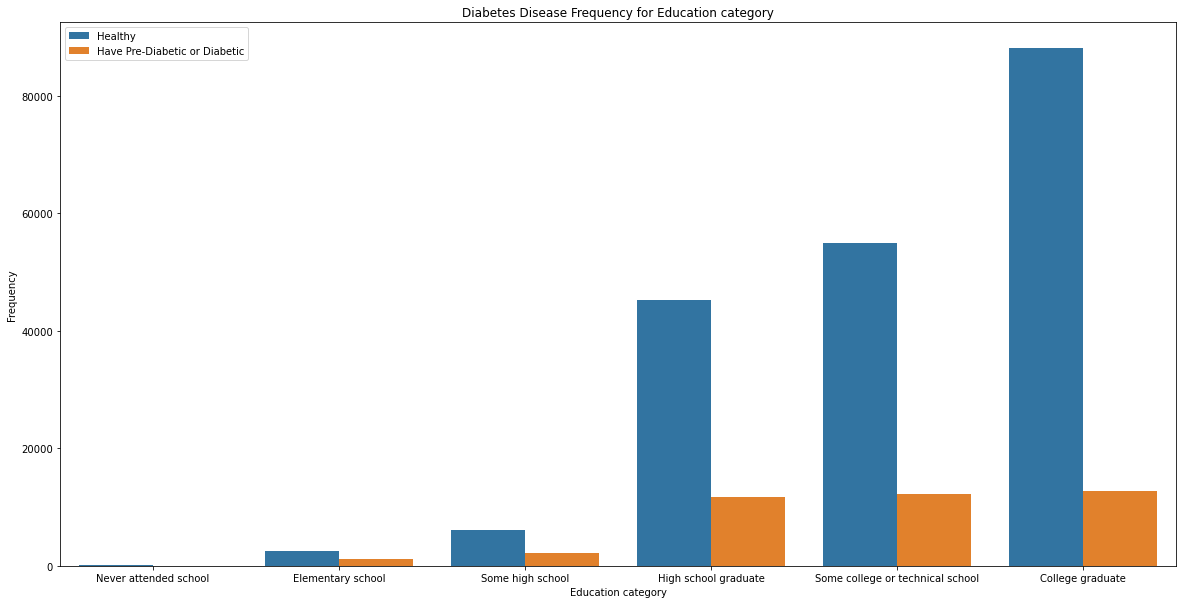

In [114]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Education', data=data_binary, hue=diabetes)
ax.set(xticklabels = (['Never attended school', 'Elementary school', 'Some high school', 'High school graduate', 
                       'Some college or technical school', 'College graduate']))
plt.title('Diabetes Disease Frequency for Education category')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Education category')
plt.show()

In [115]:
education_df = pd.crosstab(education, diabetes, rownames=['Education category'], colnames=['Diabetes'])
education_df['Healthy [%]'] = round((education_df['Healthy'] / education_df['Healthy'].sum()) * 100,1)
education_df['Pre-diabetic or Diabetic [%]'] = round((education_df['Pre-diabetic or Diabetic'] /
                                                      education_df['Pre-diabetic or Diabetic'].sum()) * 100,1)
education_df

Diabetes,Healthy,Pre-diabetic or Diabetic,Healthy [%],Pre-diabetic or Diabetic [%]
Education category,,,,
College graduate,88136,12737,44.7,31.8
Elementary school,2453,1162,1.2,2.9
High school graduate,45240,11674,23.0,29.2
Never attended school,112,38,0.1,0.1
Some college or technical school,54937,12172,27.9,30.4
Some high school,6129,2233,3.1,5.6


We can see that the better the education, the smaller the percentage of people with pre-diabetic status or diabetes.
It is possible that better educated people are more aware of the factors influencing diabetes incidence and try to prevent it.

#### Relationship between Income and Diabetes

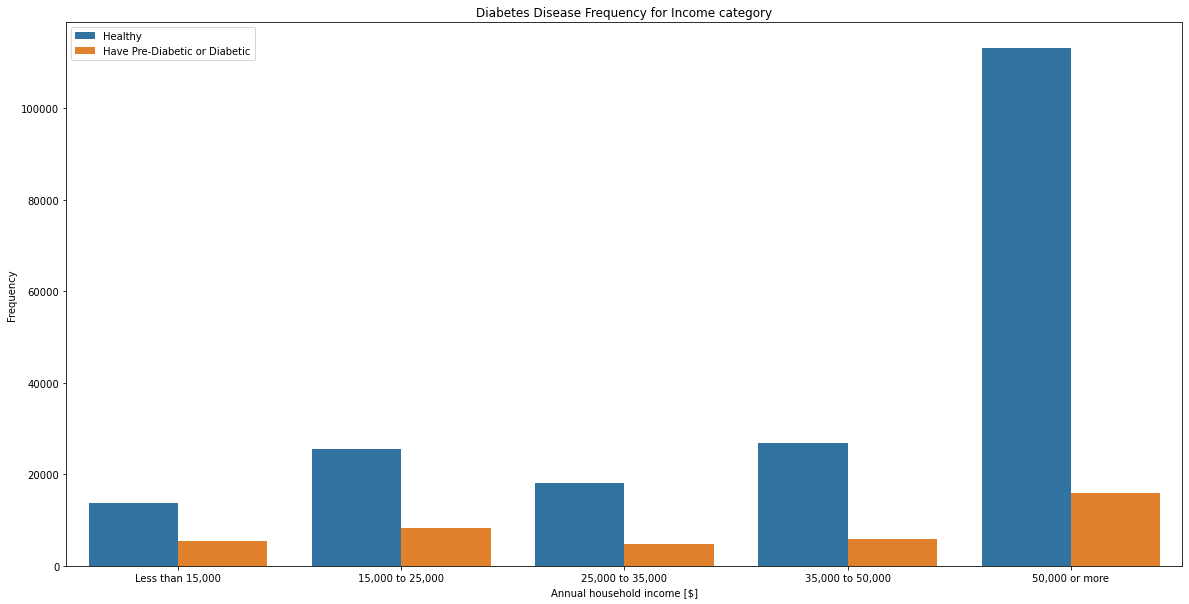

In [116]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Income', data=data_binary, hue=diabetes)
ax.set(xticklabels = (['Less than 15,000', '15,000 to 25,000', '25,000 to 35,000', 
                       '35,000 to 50,000', '50,000 or more']))
plt.title('Diabetes Disease Frequency for Income category')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Annual household income [$]')
plt.show()

In [117]:
income_df = pd.crosstab(income, diabetes, rownames=['Income category [$]'], colnames=['Diabetes'])
income_df['Healthy [%]'] = round((income_df['Healthy'] / income_df['Healthy'].sum()) * 100,1)
income_df['Pre-diabetic or Diabetic [%]'] = round((income_df['Pre-diabetic or Diabetic'] /
                                                   income_df['Pre-diabetic or Diabetic'].sum()) * 100,1)
income_df

Diabetes,Healthy,Pre-diabetic or Diabetic,Healthy [%],Pre-diabetic or Diabetic [%]
Income category [$],,,,
"15,000 to 25,000",25447,8198,12.9,20.5
"25,000 to 35,000",18045,4783,9.2,12.0
"35,000 to 50,000",26734,5908,13.6,14.8
"50,000 or more",113136,15807,57.4,39.5
"Less than 15,000",13645,5320,6.9,13.3


We can see that only apart from people earning over 50,000 USD a year, they show a lower incidence of diabetes.
One in four people earning less than 35,000 USD a year has diabetes.

#### Relationship between General Health and Physical Activity

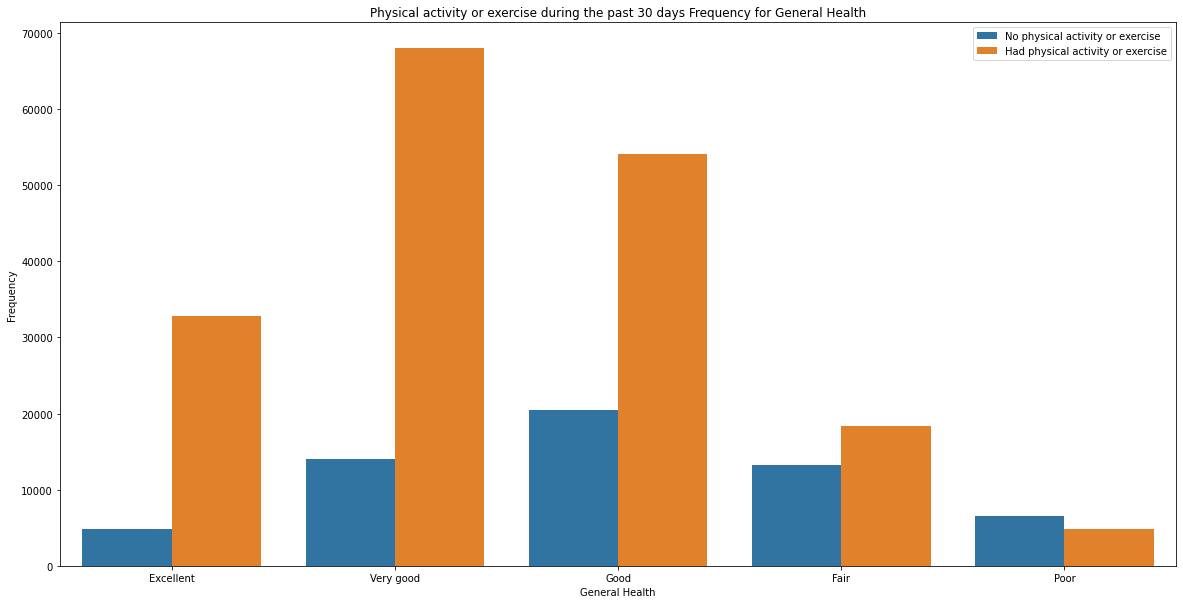

In [118]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='GeneralHealth', data=data_binary, hue=activity)
ax.set(xticklabels = (['Excellent', 'Very good', 'Good', 'Fair', 'Poor']))
plt.title('Physical activity or exercise during the past 30 days Frequency for General Health')
plt.legend(["No physical activity or exercise", "Had physical activity or exercise"])
plt.ylabel('Frequency')
plt.xlabel('General Health')
plt.show()

In [119]:
health_activity_df = pd.crosstab(generalhealth, activity, rownames=['General Health'], 
                                 colnames=['Physical activity during the past 30 days'])
health_activity_df['Had physical activity or exercise [%]'] = round(
    (health_activity_df['Had physical activity or exercise'] / 
     health_activity_df['Had physical activity or exercise'].sum())*100,1)
health_activity_df['No physical activity or exercise [%]'] = round(
    (health_activity_df['No physical activity or exercise'] / 
    health_activity_df['No physical activity or exercise'].sum())*100,1)
health_activity_df

Physical activity during the past 30 days,Had physical activity or exercise,No physical activity or exercise,Had physical activity or exercise [%],No physical activity or exercise [%]
General Health,,,,
Excellent,32757,4870,18.4,8.2
Fair,18367,13226,10.3,22.4
Good,54051,20425,30.4,34.6
Poor,4825,6522,2.7,11.0
Very good,67988,13992,38.2,23.7


We can see that whether someone exercises at least once a month has a big impact on their well-being.
People who exercise at least once a month assess their health as good, very good or delicious much more often than people who do not exercise.

#### Relationship between General Health and Income

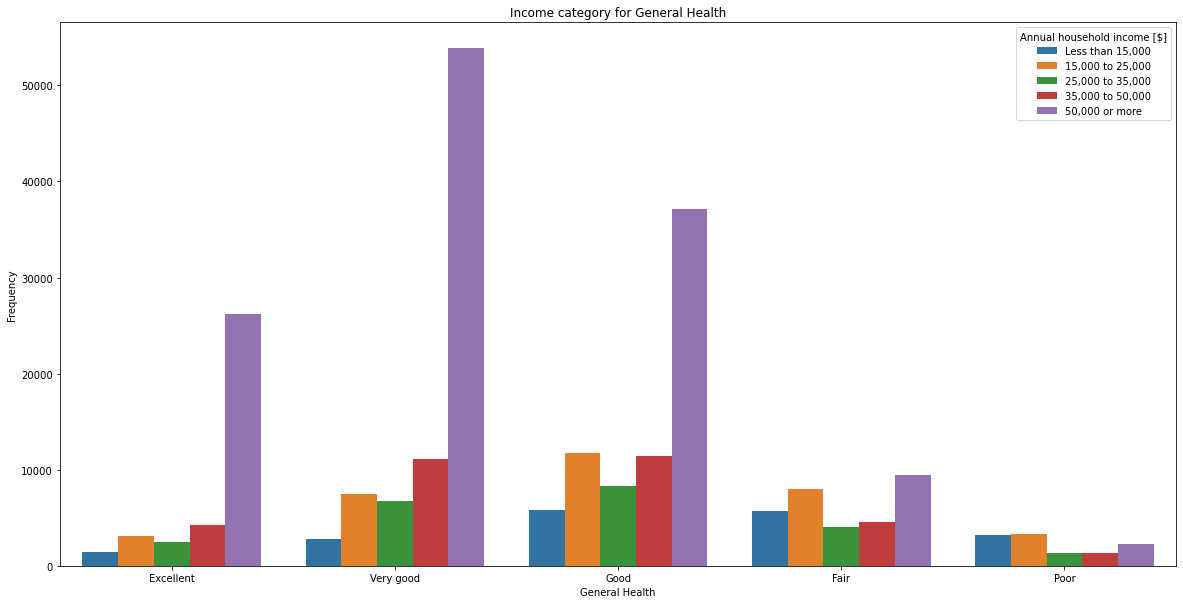

In [120]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='GeneralHealth', data=data_binary, hue='Income')
ax.set(xticklabels = (['Excellent', 'Very good', 'Good', 'Fair', 'Poor']))
plt.title('Income category for General Health')
plt.legend(['Less than 15,000', '15,000 to 25,000', '25,000 to 35,000', 
            '35,000 to 50,000', '50,000 or more']).set_title('Annual household income [$]')
plt.ylabel('Frequency')
plt.xlabel('General Health')
plt.show()

In [121]:
health_income_df = pd.crosstab(income, generalhealth, rownames=['Income category'], colnames=['General Health'])
health_income_df['Excellent [%]'] = round((health_income_df['Excellent'] / health_income_df['Excellent'].sum())*100,1)
health_income_df['Fair [%]'] = round((health_income_df['Fair'] / health_income_df['Fair'].sum())*100,1)
health_income_df['Good [%]'] = round((health_income_df['Good'] / health_income_df['Good'].sum())*100,1)
health_income_df['Poor [%]'] = round((health_income_df['Poor'] / health_income_df['Poor'].sum())*100,1)
health_income_df['Very good [%]'] = round((health_income_df['Very good'] / health_income_df['Very good'].sum())*100,1)
health_income_df

General Health,Excellent,Fair,Good,Poor,Very good,Excellent [%],Fair [%],Good [%],Poor [%],Very good [%]
Income category,,,,,,,,,,
"15,000 to 25,000",3147,7960,11781,3326,7431,8.4,25.2,15.8,29.3,9.1
"25,000 to 35,000",2524,3995,8330,1283,6696,6.7,12.6,11.2,11.3,8.2
"35,000 to 50,000",4278,4507,11412,1296,11149,11.4,14.3,15.3,11.4,13.6
"50,000 or more",26209,9472,37116,2272,53874,69.7,30.0,49.8,20.0,65.7
"Less than 15,000",1469,5659,5837,3170,2830,3.9,17.9,7.8,27.9,3.5


We can see that earnings also have an impact on your well-being.
People earning more than 50,000 USD feel at least well more often. It is also evident that among the people who feel poor, the most are those who earn the least.\
Higher earnings can translate into a greater sense of security or a healthier lifestyle, which can result in better overall health.

#### Relationship between Education and Income

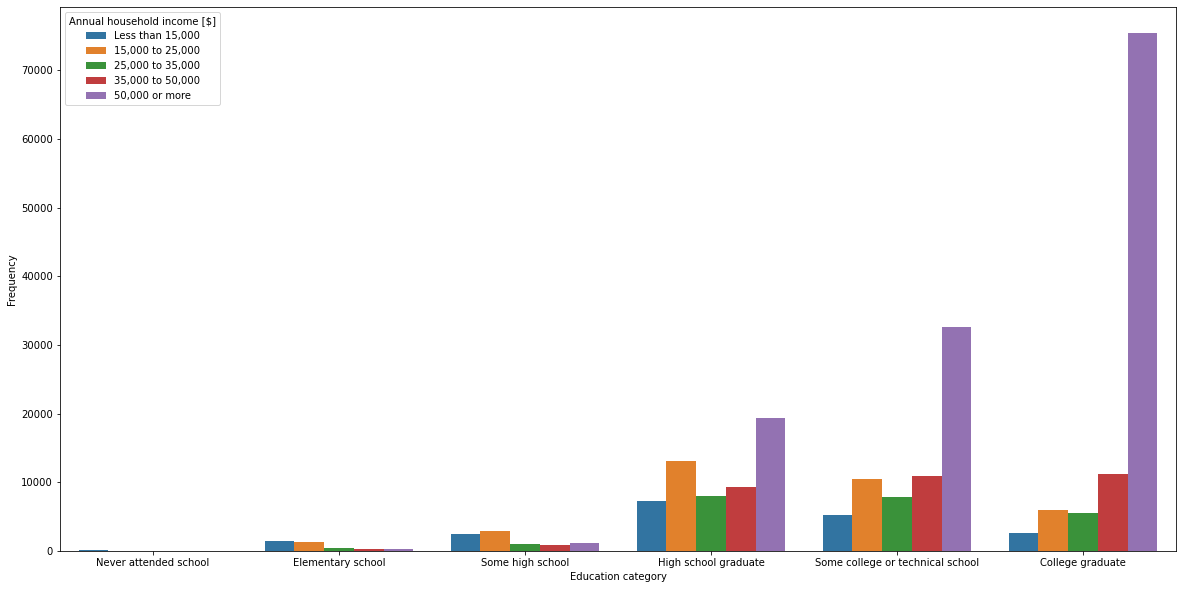

In [122]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Education', data=data_binary, hue='Income')
ax.set(xticklabels = (['Never attended school', 'Elementary school', 'Some high school', 'High school graduate', 
                       'Some college or technical school', 'College graduate']))
plt.legend(['Less than 15,000', '15,000 to 25,000', '25,000 to 35,000', 
            '35,000 to 50,000', '50,000 or more']).set_title('Annual household income [$]')
plt.ylabel('Frequency')
plt.xlabel('Education category')
plt.show()

In [123]:
edu_income_df = pd.crosstab(income, education, rownames=['Income category'], colnames=['Education category'])
edu_income_df['College graduate [%]'] = round((edu_income_df['College graduate'] / 
                                               edu_income_df['College graduate'].sum())*100,1)
edu_income_df['Elementary school [%]'] = round((edu_income_df['Elementary school'] / 
                                                edu_income_df['Elementary school'].sum())*100,1)
edu_income_df['High school graduate [%]'] = round((edu_income_df['High school graduate'] / 
                                                   edu_income_df['High school graduate'].sum())*100,1)
edu_income_df['Never attended school [%]'] = round((edu_income_df['Never attended school'] / 
                                                    edu_income_df['Never attended school'].sum())*100,1)
edu_income_df['Some college or technical school [%]'] = round((edu_income_df['Some college or technical school'] / 
                                                               edu_income_df['Some college or technical school'].sum())*100,1)
edu_income_df['Some high school [%]'] = round((edu_income_df['Some high school'] / 
                                               edu_income_df['Some high school'].sum())*100,1)
edu_income_df

Education category,College graduate,Elementary school,High school graduate,Never attended school,Some college or technical school,Some high school,College graduate [%],Elementary school [%],High school graduate [%],Never attended school [%],Some college or technical school [%],Some high school [%]
Income category,,,,,,,,,,,,
"15,000 to 25,000",6012,1224,13070,43,10478,2818,6.0,33.9,23.0,28.7,15.6,33.7
"25,000 to 35,000",5571,462,7933,20,7797,1045,5.5,12.8,13.9,13.3,11.6,12.5
"35,000 to 50,000",11236,269,9356,9,10936,836,11.1,7.4,16.4,6.0,16.3,10.0
"50,000 or more",75438,289,19366,22,32621,1207,74.8,8.0,34.0,14.7,48.6,14.4
"Less than 15,000",2616,1371,7189,56,5277,2456,2.6,37.9,12.6,37.3,7.9,29.4


It is clear from the chart that education plays a significant role in the future level of annual earnings.\
The highest number of earning persons completed studies or attended a technical school.
People who only graduated from high school can earn in the future almost equally the amount from each analyzed range.
By contrast, those who only complete elementary school earn up to 25,000 USD most often.\
We can see that in our dataset, people earning over 50,000 USD were activated much more often.

## Trening and test data

Let's break down our data into dependent and independent variables.

In [4]:
data_binary = pd.read_csv(r'Diabetes_2019.csv')

In [5]:
y = data_binary.Diabetes_01
X = data_binary.drop(['Diabetes_01'], axis=1)

Let's split our data into training (80%) and testing (20%) sets.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Let's see what our data sets look like after the split into the training and test set.

In [7]:
print('X_train:', X_train.shape, 'X_test:', X_test.shape)
print('y_train:', y_train.shape, 'y_test:', y_test.shape)

X_train: (189618, 25) X_test: (47405, 25)
y_train: (189618,) y_test: (47405,)


We have almost 190,000 rows in the training set and almost 50,000 rows in the test set.

## Model selection and evaluation functions

Now let's define the functions that automate hyperparameter tuning and model evaluation.

In [8]:
# function for tuning hyperparams of a classifiers

def optimize_model(model, param_grid, cv = 5, X_train = X_train, y_train = y_train):
    '''Performs grid search over param_grid with cv-fold cross validation.
    
    Function arguments:
        model: sklearn classifier
        param_grid (dict): parameters grid
        cv (int): number of folds in cross validation
        X_train (array): training set
        y_train (array): training labels
        
    Returns:
        Best model found, fitted on the entire data set.
    '''
    
    optimizer = GridSearchCV(model, param_grid = param_grid, scoring="accuracy", cv = cv, n_jobs = -1, verbose = True)
    optimizer.fit(X_train, y_train)
    print('Best parameters found:')
    print(optimizer.best_params_)
    print('\nBest score: %0.6f' % (optimizer.best_score_))
    
    return optimizer.best_estimator_

In [9]:
# function to evalute tuned models on the test set

def evaluate_model(model, X_test = X_test, y_test = y_test):
    '''
    Function arguments:
        model: fitted sklearn classifier
        X_test (array): testing set
        y_test (array): testing labels
    '''
    
    y_pred = model.predict(X_test)
    print('\nClassification report: ')
    print(classification_report(y_test, y_pred))

## Baseline models

Before we start looking for the best model, let's look at two baselines.\
Let's start by obtaining a baseline via GaussianNB and MultinomialNB. Almost all features take values 0,1 so multinomial NB seems like a good idea.

#### GaussianNB

In [10]:
basemodel1 = GaussianNB()
basemodel1.fit(X_train, y_train)
print('Best score:', np.round(accuracy_score(y_test, basemodel1.predict(X_test)), 6))
evaluate_model(basemodel1)

Best score: 0.76224

Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.81      0.85     39444
           1       0.36      0.53      0.43      7961

    accuracy                           0.76     47405
   macro avg       0.63      0.67      0.64     47405
weighted avg       0.80      0.76      0.78     47405



In [11]:
print('Cross validation - GaussianNB:', np.round(cross_val_score(GaussianNB(), X, y, cv = 5).mean(), 6))

Cross validation - GaussianNB: 0.760369


Let's pickle this model obtained.

In [171]:
dump(basemodel1, 'models/base_gaussianNB.joblib');

#### MultinomialNB

In [12]:
basemodel2 = MultinomialNB()
basemodel2.fit(X_train, y_train)
print('Best score:', np.round(accuracy_score(y_test, basemodel2.predict(X_test)), 6))
evaluate_model(basemodel2)

Best score: 0.772387

Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     39444
           1       0.33      0.34      0.33      7961

    accuracy                           0.77     47405
   macro avg       0.60      0.60      0.60     47405
weighted avg       0.77      0.77      0.77     47405



In [13]:
print('Cross validation - MultinomialNB:', np.round(cross_val_score(MultinomialNB(), X, y, cv = 5).mean(), 6))

Cross validation - MultinomialNB: 0.767812


Let's pickle this model obtained.

In [172]:
dump(basemodel2, 'models/base_multinomialNB.joblib');

We got a pretty good result for virtually no work!

GaussianNB and MultinomialNB gave very similar results. Cross-validation of very basic layering models yielded accuracy scores of around 0.76.\
We can see that both models detect healthy individuals more accurately than those who are pre-diabetic or diagnosed with diabetes.\
Hopefully, more sophisticated classifiers will be able to detect people with diabetes with greater precision.



## Modelling

Now let's optimize some popular classifiers and test their performance on our test dataset. First, we are going to run a grid search with "sparse" parameter sets. Later, we will refine our search.

### Logistic Regression

In [14]:
# Create a pipeline
lr_model = Pipeline([("scaler", StandardScaler()), ("model", LogisticRegression())])

# Create a paramter grid
lr_param_grid = {'model__C' : 10**np.arange(-3,4, dtype = float), 
                 'model__penalty' : ['l1','l2'],  
                 'model__class_weight' : ['balanced', None]}

First, let's check the performance of the baseline logistic regression.

In [15]:
%%time

lr_baseline = LogisticRegression(random_state = 0)
lr_baseline.fit(X_train, y_train)
print('Best score:', np.round(accuracy_score(y_test, lr_baseline.predict(X_test)), 6))
evaluate_model(lr_baseline)

Best score: 0.839532

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     39444
           1       0.56      0.20      0.29      7961

    accuracy                           0.84     47405
   macro avg       0.71      0.58      0.60     47405
weighted avg       0.81      0.84      0.81     47405

CPU times: total: 29.2 s
Wall time: 1.68 s


Let's optimize the hyperparameters and evaluate model on test set.

In [16]:
%%time

lr_model = optimize_model(lr_model, lr_param_grid)
evaluate_model(lr_model)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters found:
{'model__C': 0.001, 'model__class_weight': None, 'model__penalty': 'l2'}

Best score: 0.839773

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     39444
           1       0.57      0.19      0.28      7961

    accuracy                           0.84     47405
   macro avg       0.71      0.58      0.59     47405
weighted avg       0.81      0.84      0.80     47405

CPU times: total: 7.69 s
Wall time: 9.21 s


We see that class weight and penalty should remain as default. Let's try and narrow down our search for optimal value of C.\
Let's define a new grid and search it and evaluate optimized model on test set.

In [17]:
%%time

lr_model = Pipeline([("scaler", StandardScaler()), ("model", LogisticRegression())])
lr_param_grid = {'model__C' : 10**np.linspace(-3, 0, num=50)}
lr_model = optimize_model(lr_model, lr_param_grid)
evaluate_model(lr_model)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:
{'model__C': 0.0013257113655901094}

Best score: 0.839836

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     39444
           1       0.56      0.19      0.28      7961

    accuracy                           0.84     47405
   macro avg       0.71      0.58      0.60     47405
weighted avg       0.81      0.84      0.80     47405

CPU times: total: 10.1 s
Wall time: 13.2 s


#### Confusion Matrix for Logistic Regression

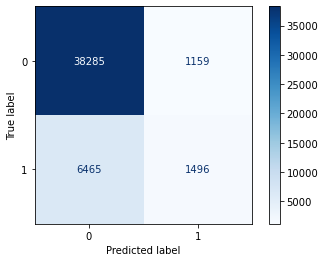

In [18]:
plot_confusion_matrix(lr_model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

We can see that the optimization of parameter C did not improve the accuracy of the linear regression model.\
Let's pickle the best logistic regression model obtained.

In [19]:
dump(lr_model, 'models/lr_model.joblib');

### SVM

In [20]:
# Create a pipeline
svm_model = Pipeline([("scaler", StandardScaler()), ("model", SVC(kernel='rbf'))])

# Create a parameter grid
svm_param_grid = {'model__C' : 10**np.arange(-3,4, dtype = float),
                  'model__class_weight' : ['balanced', None]}

First, let's check the performance of the baseline Support Vector Machines.

In [52]:
%%time

svm_baseline = SVC(random_state = 0)
svm_baseline.fit(X_train, y_train)
print('Best score:', np.round(accuracy_score(y_test, svm_baseline.predict(X_test)), 6))
evaluate_model(svm_baseline)

Best score: 0.835882

Classification report: 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     39444
           1       0.67      0.04      0.08      7961

    accuracy                           0.84     47405
   macro avg       0.76      0.52      0.50     47405
weighted avg       0.81      0.84      0.77     47405

CPU times: total: 1h 29min 38s
Wall time: 1h 29min 40s


Let's optimize the hyperparameters and evaluate model on test set.

In [21]:
# %%time

# svm_model = optimize_model(svm_model, svm_param_grid)
# evaluate_model(svm_model)

Initially, we planned to search for hyperparameters for the SVM model in order to predict the studied phenomenon with greater efficiency. However, this approach turned out to be too computationally expensive.

#### Confusion Matrix for SVM

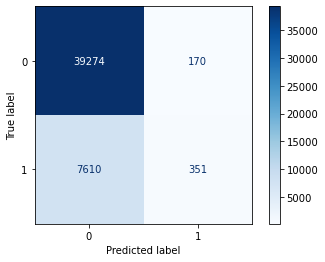

In [53]:
plot_confusion_matrix(svm_baseline, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

We could continue to look for more optimal model parameters, but our dataset for the SVM classifier is too large.
Searching for better parameters is too computationally expensive. \
Still the obtained result is satisfactory and is better, close to the Linear Regression model.

Let's pickle the best logistic regression model obtained.

In [54]:
dump(svm_baseline, 'models/base_svm_model.joblib');

### Decision Tree Classifier

In [22]:
# create a pipeline
tree_model = Pipeline([("scaler", StandardScaler()), ("model", DecisionTreeClassifier())])

# create parameter grids
tree_param_grid = {'model__criterion': ['gini', 'entropy'],
                   'model__max_depth': [2, 5, 10, 20, 30],
                   'model__min_samples_leaf': [5, 10, 20, 30]}

First, let's check the performance of the baseline Decision Tree Classifier.

In [23]:
%%time

tree_baseline = DecisionTreeClassifier(random_state = 0)
tree_baseline.fit(X_train, y_train)
print('Best score:', np.round(accuracy_score(y_test, tree_baseline.predict(X_test)), 6))
evaluate_model(tree_baseline)

Best score: 0.769771

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     39444
           1       0.32      0.33      0.32      7961

    accuracy                           0.77     47405
   macro avg       0.59      0.59      0.59     47405
weighted avg       0.77      0.77      0.77     47405

CPU times: total: 938 ms
Wall time: 958 ms


Let's optimize the hyperparameters and evaluate model on test set.

In [24]:
%%time

tree_model = optimize_model(tree_model, tree_param_grid)
evaluate_model(tree_model)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters found:
{'model__criterion': 'entropy', 'model__max_depth': 10, 'model__min_samples_leaf': 30}

Best score: 0.838517

Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     39444
           1       0.57      0.18      0.27      7961

    accuracy                           0.84     47405
   macro avg       0.71      0.58      0.59     47405
weighted avg       0.81      0.84      0.80     47405

CPU times: total: 3.39 s
Wall time: 11.6 s


The min_samples_leaf parameter has a boundary value, let's extend our search. Let's set the other parameters as we received from the previous model.

In [26]:
%%time

tree_model = Pipeline([("scaler", StandardScaler()), ("model", DecisionTreeClassifier(criterion = 'entropy', 
                                                                                      max_depth = 10))])
tree_param_grid = {'model__min_samples_leaf': [30, 40, 50, 75, 100]}
tree_model = optimize_model(tree_model, tree_param_grid)
evaluate_model(tree_model)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found:
{'model__min_samples_leaf': 100}

Best score: 0.839240

Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     39444
           1       0.57      0.18      0.27      7961

    accuracy                           0.84     47405
   macro avg       0.71      0.57      0.59     47405
weighted avg       0.81      0.84      0.80     47405

CPU times: total: 938 ms
Wall time: 2.3 s


Again, we're at the boundary, so let's look further.

In [27]:
%%time

tree_model = Pipeline([("scaler", StandardScaler()), ("model", DecisionTreeClassifier(criterion = 'entropy', 
                                                                                      max_depth = 10))])
tree_param_grid = {'model__min_samples_leaf': [100, 150, 200, 300]}
tree_model = optimize_model(tree_model, tree_param_grid)
evaluate_model(tree_model)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found:
{'model__min_samples_leaf': 150}

Best score: 0.839493

Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     39444
           1       0.57      0.17      0.26      7961

    accuracy                           0.84     47405
   macro avg       0.71      0.57      0.59     47405
weighted avg       0.81      0.84      0.80     47405

CPU times: total: 828 ms
Wall time: 2.02 s


It looks like we've found the region where the best parameters are found. Let's narrow this region down.

In [28]:
%%time

tree_model = Pipeline([("scaler", StandardScaler()), ("model", DecisionTreeClassifier(criterion = 'entropy', 
                                                                                      max_depth = 10))])
tree_param_grid = {'model__min_samples_leaf': np.arange(140,150,1)}
tree_model = optimize_model(tree_model, tree_param_grid)
evaluate_model(tree_model)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:
{'model__min_samples_leaf': 148}

Best score: 0.839493

Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     39444
           1       0.57      0.17      0.26      7961

    accuracy                           0.84     47405
   macro avg       0.71      0.57      0.59     47405
weighted avg       0.81      0.84      0.80     47405

CPU times: total: 1.27 s
Wall time: 3.72 s


#### Confusion Matrix for Decision Tree Classifier

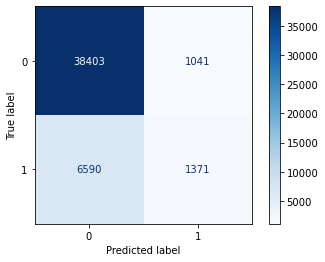

In [29]:
plot_confusion_matrix(tree_model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

We have finished the search. Our best decision tree includes criterion as entropy, max depth of 10, and a minimum number of samples to be in a leaf node of 148.

Let's pickle the best Decision Tree Classifier model obtained.

In [30]:
dump(tree_model, 'models/tree_model.joblib');

### Random Forest Classifier

In [31]:
# create a pipeline
forest_model = Pipeline([("scaler", StandardScaler()), ("model", RandomForestClassifier())])

# create parameter grids
forest_param_grid = {'model__n_estimators': [200, 500, 1000],
                     'model__max_depth' : [5, 15, 50],
                     'model__min_samples_leaf': [5, 10, 20],
                     'model__criterion': ['gini', 'entropy']}

First, let's check the performance of the baseline Random Forest Classifier.

In [32]:
%%time

forest_baseline = RandomForestClassifier(random_state = 0)
forest_baseline.fit(X_train, y_train)
print('Best score:', np.round(accuracy_score(y_test, forest_baseline.predict(X_test)), 6))
evaluate_model(forest_baseline)

Best score: 0.828478

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     39444
           1       0.48      0.22      0.30      7961

    accuracy                           0.83     47405
   macro avg       0.67      0.58      0.60     47405
weighted avg       0.79      0.83      0.80     47405

CPU times: total: 20.9 s
Wall time: 20.9 s


Let's optimize the hyperparameters and evaluate model on test set.

In [33]:
%%time

forest_model = optimize_model(forest_model, forest_param_grid)
evaluate_model(forest_model)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found:
{'model__criterion': 'entropy', 'model__max_depth': 50, 'model__min_samples_leaf': 10, 'model__n_estimators': 500}

Best score: 0.840885

Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     39444
           1       0.58      0.17      0.26      7961

    accuracy                           0.84     47405
   macro avg       0.72      0.57      0.59     47405
weighted avg       0.81      0.84      0.80     47405

CPU times: total: 1min 16s
Wall time: 26min 2s


The max_depth and n_estimators parameters have a boundary value, let's extend our search. Let's set the min_samples_leaf and criterium parameters as we received from the previous model.

In [37]:
%%time

forest_model = Pipeline([("scaler", StandardScaler()), ("model", RandomForestClassifier(min_samples_leaf = 10,
                                                                                        criterion = 'entropy'))])
forest_param_grid = {'model__n_estimators': [400, 500, 700],
                     'model__max_depth' : [35, 50, 100]}
forest_model = optimize_model(forest_model, forest_param_grid)
evaluate_model(forest_model)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters found:
{'model__max_depth': 100, 'model__n_estimators': 400}

Best score: 0.840906

Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     39444
           1       0.58      0.17      0.26      7961

    accuracy                           0.84     47405
   macro avg       0.72      0.57      0.59     47405
weighted avg       0.81      0.84      0.80     47405

CPU times: total: 58.8 s
Wall time: 6min 2s


It looks like we've found the region where the best parameters are found. Let's narrow this region down.

In [38]:
%%time

forest_model = Pipeline([("scaler", StandardScaler()), ("model", RandomForestClassifier(min_samples_leaf = 10,
                                                                                        criterion = 'entropy'))])
forest_param_grid = {'model__n_estimators': np.arange(400, 500, 20),
                     'model__max_depth' : np.arange(50, 100, 10)}
forest_model = optimize_model(forest_model, forest_param_grid)
evaluate_model(forest_model)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters found:
{'model__max_depth': 90, 'model__n_estimators': 460}

Best score: 0.840996

Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     39444
           1       0.58      0.17      0.26      7961

    accuracy                           0.84     47405
   macro avg       0.72      0.57      0.59     47405
weighted avg       0.81      0.84      0.80     47405

CPU times: total: 1min 10s
Wall time: 11min 51s


We are getting closer and closer. Let's search further.

In [39]:
%%time

forest_model = Pipeline([("scaler", StandardScaler()), ("model", RandomForestClassifier(min_samples_leaf = 10,
                                                                                        criterion = 'entropy'))])
forest_param_grid = {'model__n_estimators': np.arange(450, 470, 5),
                     'model__max_depth' : np.arange(85, 96, 1)}
forest_model = optimize_model(forest_model, forest_param_grid)
evaluate_model(forest_model)

Fitting 5 folds for each of 44 candidates, totalling 220 fits
Best parameters found:
{'model__max_depth': 86, 'model__n_estimators': 465}

Best score: 0.841059

Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     39444
           1       0.58      0.17      0.26      7961

    accuracy                           0.84     47405
   macro avg       0.72      0.57      0.59     47405
weighted avg       0.81      0.84      0.80     47405

CPU times: total: 1min 8s
Wall time: 21min 16s


We know the next parameter. Let's look for the last one.

In [40]:
%%time

forest_model = Pipeline([("scaler", StandardScaler()), ("model", RandomForestClassifier(min_samples_leaf = 10,
                                                                                        criterion = 'entropy',
                                                                                        max_depth = 86))])
forest_param_grid = {'model__n_estimators': np.arange(460, 470, 1)}
forest_model = optimize_model(forest_model, forest_param_grid)
evaluate_model(forest_model)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:
{'model__n_estimators': 464}

Best score: 0.841038

Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     39444
           1       0.59      0.17      0.26      7961

    accuracy                           0.84     47405
   macro avg       0.72      0.57      0.59     47405
weighted avg       0.81      0.84      0.80     47405

CPU times: total: 1min 7s
Wall time: 5min 44s


#### Confusion Matrix for Random Forest Classifier

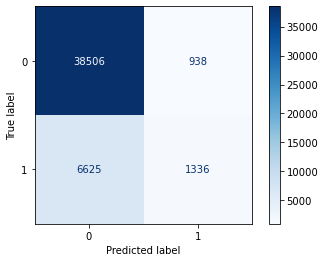

In [41]:
plot_confusion_matrix(forest_model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

We have finished the search. Our best random forest model includes criterion as entropy, max depth of 86, a minimum number of samples to be in a leaf node of 10 and number od estimators of 464.

Let's pickle the best Random Forest Classifier model obtained.

In [42]:
dump(lr_model, 'models/forest_model.joblib');

### XGBoost Classifier

In [45]:
# create a pipeline
xgb_model = Pipeline([("scaler", StandardScaler()), ("model", xgb.XGBClassifier(eval_metric='error'))])

# create parameter grids
xgb_param_grid  = {'model__n_estimators': [200, 400, 800],
                   'model__max_depth': [5, 10, 20],
                   'model__learning_rate': [0.05, 0.1, 0.20],
                   'model__min_child_weight': [1, 10, 100]}

First, let's check the performance of the baseline XGBoost Classifier.

In [44]:
%%time

xgb_baseline = xgb.XGBClassifier(eval_metric='error', random_state = 0)
xgb_baseline.fit(X_train, y_train)
print('Best score:', np.round(accuracy_score(y_test, xgb_baseline.predict(X_test)), 6))
evaluate_model(xgb_baseline)

Best score: 0.839616

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     39444
           1       0.56      0.22      0.31      7961

    accuracy                           0.84     47405
   macro avg       0.71      0.59      0.61     47405
weighted avg       0.81      0.84      0.81     47405

CPU times: total: 1min 32s
Wall time: 2.62 s


Let's optimize the hyperparameters and evaluate model on test set.

In [46]:
%%time

xgb_model = optimize_model(xgb_model, xgb_param_grid)
evaluate_model(xgb_model)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:
{'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__min_child_weight': 100, 'model__n_estimators': 800}

Best score: 0.841856

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     39444
           1       0.58      0.21      0.31      7961

    accuracy                           0.84     47405
   macro avg       0.72      0.59      0.61     47405
weighted avg       0.81      0.84      0.81     47405

CPU times: total: 8min 31s
Wall time: 1h 20min 9s


All the parameters we are looking for have a limit value. Let's start our search.

In [47]:
%%time

xgb_model = Pipeline([("scaler", StandardScaler()), ("model", xgb.XGBClassifier(eval_metric='error'))])
xgb_param_grid  = {'model__n_estimators': [800, 1000],
                   'model__max_depth': [1, 3, 5],
                   'model__learning_rate': [0.001, 0.01, 0.05],
                   'model__min_child_weight': [100, 200]}
xgb_model = optimize_model(xgb_model, xgb_param_grid)
evaluate_model(xgb_model)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:
{'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__min_child_weight': 100, 'model__n_estimators': 800}

Best score: 0.841856

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     39444
           1       0.58      0.21      0.31      7961

    accuracy                           0.84     47405
   macro avg       0.72      0.59      0.61     47405
weighted avg       0.81      0.84      0.81     47405

CPU times: total: 8min 33s
Wall time: 13min 4s


It looks like we've found the region where the best parameters are found. Let's narrow this region down.

In [48]:
%%time

xgb_model = Pipeline([("scaler", StandardScaler()), ("model", xgb.XGBClassifier(eval_metric = 'error', 
                                                                                max_depth = 5, 
                                                                                learning_rate = 0.05, 
                                                                                min_child_weight = 100))])
xgb_param_grid  = {'model__n_estimators': [750, 800, 850]}
xgb_model = optimize_model(xgb_model, xgb_param_grid)
evaluate_model(xgb_model)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters found:
{'model__n_estimators': 800}

Best score: 0.841856

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     39444
           1       0.58      0.21      0.31      7961

    accuracy                           0.84     47405
   macro avg       0.72      0.59      0.61     47405
weighted avg       0.81      0.84      0.81     47405

CPU times: total: 8min 28s
Wall time: 1min 41s


#### Confusion Matrix for XGBoost Classifier

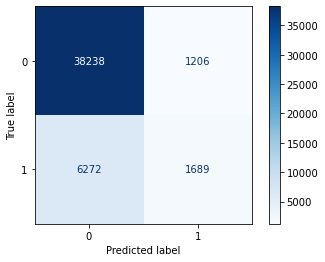

In [49]:
plot_confusion_matrix(xgb_model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

We found the best model parameters. Let's pickle the best XGBoost model obtained.

In [50]:
dump(xgb_model, 'models/xgb_model.joblib');

## Metrics

Let's collect all the models we have built and see what their classification metrics look like.

In [13]:
from sklearn import metrics
model_name = []
accuracy_score = []
f1_score = []
roc_auc_score = []
recall_score = []
precision_score = []
    
def metrics_models(name, model, X_test = X_test, y_test = y_test):
    models = list()
    models.append((name, model))
    
    for name, model in models:
        model_name.append(name)
        accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))
        f1_score.append(metrics.f1_score(y_test, model.predict(X_test)))
        roc_auc_score.append(metrics.roc_auc_score(y_test, model.predict(X_test)))
        recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
        precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))


In [143]:
metrics_models('Base GaussianNB', basemodel1)
metrics_models('Base MultinomialNB', basemodel2)
metrics_models('Base LinearRegression', lr_baseline)
metrics_models('LinearRegression', lr_model)
metrics_models('Base SVC', svm_baseline)
metrics_models('Base DecisionTreeClassifier', tree_baseline)
metrics_models('DecisionTreeClassifier', tree_model)
metrics_models('Base RandomForestClassifier', forest_baseline)
metrics_models('RandomForestClassifier', forest_model)
metrics_models('Base XGBoostClassifier', xgb_baseline)
metrics_models('XGBoostClassifier', xgb_model)

Let's create a data frame for the metrics of our classifiers.

In [144]:
metrics_df = pd.DataFrame({'Model': model_name,
                           'Accuracy': accuracy_score,
                           'F1-score': f1_score,
                           'AUC': roc_auc_score,
                           'Recall': recall_score,
                           'Precision': precision_score})

In [145]:
metrics_df

,Model,Accuracy,F1-score,AUC,Recall,Precision
0,Base GaussianNB,0.762240,0.425857,0.667585,0.525060,0.358183
1,Base MultinomialNB,0.772387,0.331640,0.598337,0.336264,0.327142
2,Base LinearRegression,0.839532,0.292570,0.583342,0.197588,0.563395
3,LinearRegression,0.839173,0.281839,0.579266,0.187916,0.563465
4,Base SVC,0.835882,0.082763,0.519890,0.044090,0.673704
5,Base DecisionTreeClassifier,0.769771,0.323121,0.593156,0.327220,0.319123
6,DecisionTreeClassifier,0.839025,0.264340,0.572911,0.172215,0.568408
7,Base RandomForestClassifier,0.828478,0.298628,0.584620,0.217435,0.476597
8,RandomForestClassifier,0.840460,0.261065,0.572019,0.167818,0.587511
9,Base XGBoostClassifier,0.839616,0.311135,0.590611,0.215676,0.558192


Let's check the results. 
It seems that the best model is XGBoost Classifier with hyperparameters. 84.2% accuracy is not terrible. But what do the other metrics tell us?

* **Accuracy:**
    * This term tells us how many right classifications were made out of all the classifications. 
    * In case we have a very unbalanced data set, this metric will not show it to us.
    * We can see that the model classified well over 84% of all rows, which is quite a good result.
    
    
* **F1-score:**
    * This is a very useful measure compared to "Accuracy". The F-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model’s precision and recall.
    * We can see that our models are very poor at classifying people with diabetes. Most likely this is because we have a highly unbalanced dataset.
    * XGBoostClassifier had the second-best f1-score of just 0.31.
    
    
* **AUC:**
    * If we use a random model to classify, it has a 50% probability of classifying the positive and negative classes correctly.
    * A perfect model has a 100% probability of classifying the positive and negative classes correctly.
    * In other words, a model with AUC close to 1. When we say a model has a high AUC score, it means the model’s ability to separate the classes is very high (high separability). This is a very important metric that should be checked while selecting a classification model.
    
    
* **Recall:**
    * Out of all the actual real positive cases, how many were identified as positive.
    * A model that has the highest recall value we should to be selected among all the models.
    
    
* **Precision:**
    * This parameter shows us how many are actually truly positive of all that were marked as positive.
    * In other words, Precision tells us how confident we can be when we tested positive that a person actually has the disease.
    * Unfortunately, 58% is only slightly better than random guessing. In 3/5 of the cases, we can be sure that the model correctly forecasts someone who actually has diabetes.
    * This could also be the cause of an imbalance in the data.

**As we can see, our model is highly unbalanced. So let's try to improve the data set and test some previously obtained models on it, e.g. XGBoostClassifier and DecisionTreeClassifier.**

## Oversampling dataset

Let's look again at the abundance of a given class of our dependent variable.

In [146]:
data_binary.groupby(['Diabetes_01']).size()

Diabetes_01
0    197007
1     40016
dtype: int64

Let's see it in the graph.

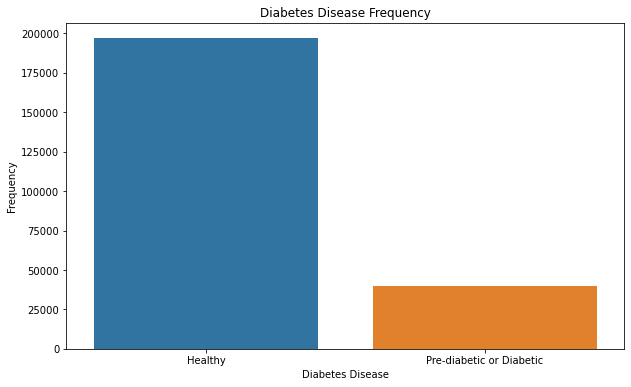

In [147]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=data_binary.Diabetes_01, data=data_binary)
ax.set(xticklabels = (['Healthy', 'Pre-diabetic or Diabetic']))
plt.title('Diabetes Disease Frequency')
plt.ylabel('Frequency')
plt.xlabel('Diabetes Disease')
plt.show()

As you can see, the dataset is unbalanced. Let's try to balance it to get a better model.

Let's oversampling the minority class meaning people with prediabetes or diagnosed with diabetes.

In [10]:
class_0 = data_binary[data_binary['Diabetes_01'] == 0]
class_1 = data_binary[data_binary['Diabetes_01'] == 1]

class_1_over = class_1.sample(len(class_0), replace=True)
data_binary_over = pd.concat([class_1_over, class_0], axis=0)

data_binary_over.groupby(['Diabetes_01']).size()

Diabetes_01
0    197007
1    197007
dtype: int64

Let's check what the shape of our data set looks like now.

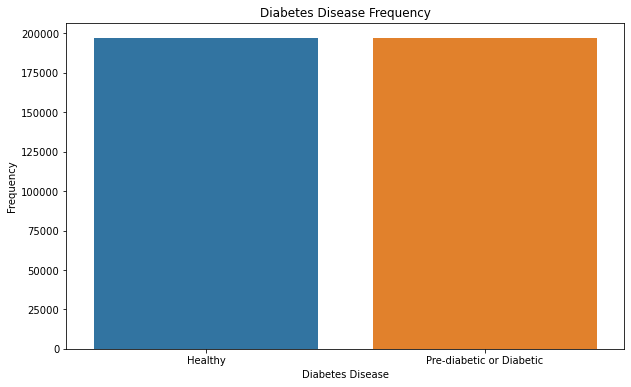

In [149]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=data_binary_over.Diabetes_01, data=data_binary_over)
ax.set(xticklabels = (['Healthy', 'Pre-diabetic or Diabetic']))
plt.title('Diabetes Disease Frequency')
plt.ylabel('Frequency')
plt.xlabel('Diabetes Disease')
plt.show()

Now our harvest is sustainable. The number of lines for both classes (diabetic and non-diabetic) is equal.

#### Save to csv

In [150]:
data_binary_over.to_csv('Diabetes_2019_oversampling.csv', sep=",", index=False)

### New trening and test data

In [11]:
data_binary_over = pd.read_csv(r'Diabetes_2019_oversampling.csv')

# Label
y_over = data_binary_over.Diabetes_01
# Features
X_over = data_binary_over.drop(['Diabetes_01'], axis=1)

# Splitting the features and label into train and test with test size = 20% and train size = 80%
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(X_over, y_over, test_size = 0.2, random_state = 0)

# Shape of train and test sets
print('Oversampled X_train:', X_over_train.shape, 'Oversampled X_test:', X_over_test.shape)
print('Oversampled y_train:', y_over_train.shape, 'Oversampled y_test:', y_over_test.shape)

Oversampled X_train: (315211, 25) Oversampled X_test: (78803, 25)
Oversampled y_train: (315211,) Oversampled y_test: (78803,)


### Decision Tree Classifier on the oversampled dataset

In [152]:
# create a pipeline
tree_model_over = Pipeline([("scaler", StandardScaler()), ("model", DecisionTreeClassifier())])

# create parameter grids
tree_over_param_grid = {'model__criterion': ['gini', 'entropy'],
                        'model__max_depth': [2, 5, 10, 20, 30],
                        'model__min_samples_leaf': [5, 10, 20, 30]}

In [153]:
%%time

tree_model_over = optimize_model(tree_model_over, tree_over_param_grid, 
                                 X_train = X_over_train, y_train = y_over_train)
evaluate_model(tree_model_over, X_test = X_over_test, y_test = y_over_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters found:
{'model__criterion': 'entropy', 'model__max_depth': 30, 'model__min_samples_leaf': 5}

Best score: 0.792364

Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.78      0.80     39016
           1       0.80      0.84      0.82     39787

    accuracy                           0.81     78803
   macro avg       0.81      0.81      0.81     78803
weighted avg       0.81      0.81      0.81     78803

CPU times: total: 5.17 s
Wall time: 26.3 s


Let's search a few parameters more closely.

In [154]:
%%time

tree_model_over = Pipeline([("scaler", StandardScaler()), ("model", DecisionTreeClassifier(criterion = 'entropy'))])
tree_over_param_grid = {'model__max_depth': [30, 50, 100],
                        'model__min_samples_leaf': [2, 5, 7, 10]}
tree_model_over = optimize_model(tree_model_over, tree_over_param_grid, 
                                 X_train = X_over_train, y_train = y_over_train)
evaluate_model(tree_model_over, X_test = X_over_test, y_test = y_over_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:
{'model__max_depth': 50, 'model__min_samples_leaf': 2}

Best score: 0.840183

Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.81      0.86     39016
           1       0.83      0.93      0.87     39787

    accuracy                           0.87     78803
   macro avg       0.87      0.87      0.87     78803
weighted avg       0.87      0.87      0.87     78803

CPU times: total: 2.94 s
Wall time: 10.5 s


Let's specify the maximum depth of the tree.

In [155]:
%%time

tree_model_over = Pipeline([("scaler", StandardScaler()), ("model", DecisionTreeClassifier(criterion = 'entropy'))])
tree_over_param_grid = {'model__max_depth': np.arange(50,100,1),
                        'model__min_samples_leaf': [1, 2, 3]}
tree_model_over = optimize_model(tree_model_over, tree_over_param_grid, 
                                 X_train = X_over_train, y_train = y_over_train)
evaluate_model(tree_model_over, X_test = X_over_test, y_test = y_over_test)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best parameters found:
{'model__max_depth': 98, 'model__min_samples_leaf': 1}

Best score: 0.877279

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.82      0.89     39016
           1       0.85      0.97      0.90     39787

    accuracy                           0.90     78803
   macro avg       0.90      0.89      0.89     78803
weighted avg       0.90      0.90      0.89     78803

CPU times: total: 17.7 s
Wall time: 1min 45s


#### Confusion Matrix for Decision Tree Classifier

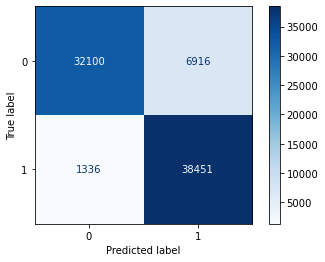

In [157]:
plot_confusion_matrix(tree_model_over, X_over_test, y_over_test, cmap=plt.cm.Blues)
plt.show()

We have finished searching for a model on an oversampled data set.
Our best DecisionTreeClassifier model has parameters: criterion as entropy, min_samples_leaf equal to 1, its a default, maximum depth of tree equal to 98.

Let's pickle the best Decision Tree Classifier model obtained.

In [158]:
dump(tree_model_over, 'models/tree_model_oversampled.joblib');

### XGBoost Classifier on the oversampled dataset

In [159]:
# create a pipeline
xgb_model_over = Pipeline([("scaler", StandardScaler()), ("model", xgb.XGBClassifier(eval_metric = 'error'))])

# create parameter grids
xgb_over_param_grid  = {'model__n_estimators': [200, 400, 800],
                        'model__max_depth': [5, 10, 20],
                        'model__learning_rate': [0.05, 0.1, 0.2],
                        'model__min_child_weight': [1, 10, 100]}

In [160]:
%%time

xgb_model_over = optimize_model(xgb_model_over, xgb_over_param_grid, 
                                 X_train = X_over_train, y_train = y_over_train)
evaluate_model(xgb_model_over, X_test = X_over_test, y_test = y_over_test)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:
{'model__learning_rate': 0.2, 'model__max_depth': 20, 'model__min_child_weight': 1, 'model__n_estimators': 800}

Best score: 0.897037

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     39016
           1       0.88      0.97      0.92     39787

    accuracy                           0.92     78803
   macro avg       0.92      0.92      0.92     78803
weighted avg       0.92      0.92      0.92     78803

CPU times: total: 1h 28min 8s
Wall time: 2h 23min 29s


Let's search a few parameters more closely.

In [161]:
%%time

xgb_model_over = Pipeline([("scaler", StandardScaler()), ("model", xgb.XGBClassifier(eval_metric = 'error',
                                                                                     min_child_weight = 1))])
xgb_over_param_grid  = {'model__n_estimators': [600, 800, 1000],
                        'model__max_depth': [20, 50],
                        'model__learning_rate': [0.2, 0.5]}
xgb_model_over = optimize_model(xgb_model_over, xgb_over_param_grid, 
                                 X_train = X_over_train, y_train = y_over_train)
evaluate_model(xgb_model_over, X_test = X_over_test, y_test = y_over_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:
{'model__learning_rate': 0.2, 'model__max_depth': 50, 'model__n_estimators': 800}

Best score: 0.898623

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     39016
           1       0.88      0.97      0.92     39787

    accuracy                           0.92     78803
   macro avg       0.92      0.92      0.92     78803
weighted avg       0.92      0.92      0.92     78803

CPU times: total: 2h 51min 39s
Wall time: 1h 43min 14s


Let's search the n_estimators and max_depth parameter in more detail.

In [162]:
%%time

xgb_model_over = Pipeline([("scaler", StandardScaler()), ("model", xgb.XGBClassifier(eval_metric = 'error',
                                                                                     min_child_weight = 1,
                                                                                     learning_rate = 0.2))])
xgb_over_param_grid  = {'model__n_estimators': [700, 800, 900],
                        'model__max_depth': [50, 100]}
xgb_model_over = optimize_model(xgb_model_over, xgb_over_param_grid, 
                                 X_train = X_over_train, y_train = y_over_train)
evaluate_model(xgb_model_over, X_test = X_over_test, y_test = y_over_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found:
{'model__max_depth': 100, 'model__n_estimators': 900}

Best score: 0.898633

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     39016
           1       0.88      0.97      0.92     39787

    accuracy                           0.92     78803
   macro avg       0.92      0.92      0.92     78803
weighted avg       0.92      0.92      0.92     78803

CPU times: total: 3h 18min 47s
Wall time: 1h 21min 41s


We can see that the models are already much better than the one carried out on the set without oversampling.

#### Confusion Matrix for XGBoost Classifier

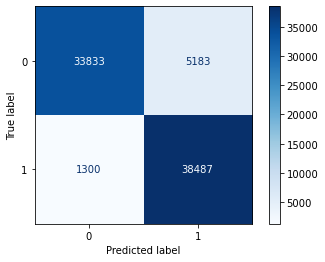

In [163]:
plot_confusion_matrix(xgb_model_over, X_over_test, y_over_test, cmap=plt.cm.Blues)
plt.show()

Let's pickle the best Decision Tree Classifier model obtained.

In [164]:
dump(xgb_model_over, 'models/xgb_model_oversampled.joblib');

### Metrics

Let's check the metrics for the models classifying our oversampled dataset.

In [65]:
metrics_models('DecisionTreeClassifier Oversampled', tree_model_over,
                    X_test = X_over_test, y_test = y_over_test)
metrics_models('XGBoostClassifier Oversampled', xgb_model_over,
                    X_test = X_over_test, y_test = y_over_test)

In [66]:
metrics_df = pd.DataFrame({'Model': model_name,
                           'Accuracy': accuracy_score,
                           'F1-score': f1_score,
                           'AUC': roc_auc_score,
                           'Recall': recall_score,
                           'Precision': precision_score})

All metrics were computed on the test set.

In [67]:
metrics_df

,Model,Accuracy,F1-score,AUC,Recall,Precision
0,Base GaussianNB,0.762240,0.425857,0.667585,0.525060,0.358183
1,Base MultinomialNB,0.772387,0.331640,0.598337,0.336264,0.327142
2,Base LinearRegression,0.839532,0.292570,0.583342,0.197588,0.563395
3,LinearRegression,0.839173,0.281839,0.579266,0.187916,0.563465
4,Base SVC,0.835882,0.082763,0.519890,0.044090,0.673704
5,Base DecisionTreeClassifier,0.769771,0.323121,0.593156,0.327220,0.319123
6,DecisionTreeClassifier,0.839025,0.264340,0.572911,0.172215,0.568408
7,Base RandomForestClassifier,0.828478,0.298628,0.584620,0.217435,0.476597
8,RandomForestClassifier,0.839173,0.281839,0.579266,0.187916,0.563465
9,Base XGBoostClassifier,0.839616,0.311135,0.590611,0.215676,0.558192


## Conclusions

We can see that oversampling of the dataset has greatly improved the performance of the predictive models.

The best result of each metric was achieved by XGBoostClassifier learned on the oversampled dataset.

XGBoost Classifier learned on oversampled dataset:
* **Accuracy:**
    * The result on the test set of 91.8 % is a pretty good result. The model incorrectly marked only 8 % of the classifications out of all the classifications made.
    
* **F1-score:**
    * The 92 % result shows how accurately it classifies the examples as "positive" or "negative", in our case into healthy people and people with diabetes.
    
* **AUC:**
    * The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
    * 0.917 is a very good score here. Almost 92 % of cases the model correctly distinguishes between positive and negative classes.
    
* **Recall:**
    * The result of almost 96.7 % is very good. Only 3 cases out of 100 the model incorrectly classifies a person as sick.
    * The model seems to be very good in clinical conditions, especially because all features are non-invasive measures.

* **Precision:**
    * The precision value of almost 88 % tells us how confident we can be that a person does have the disease.
    * This tells us how good the test is at distinguishing between people with the disease and those without the disease.
    * Almost 9/10 of the time we can be confident the model is correctly giving someone a diabetes prediction that actually has diabetes.
    

#### Let us answer the question asked at the very beginning.
* **Can survey questions from the BRFSS provide accurate predictions of whether an individual has diabetes?**

From the above metrics, it can be seen that the model can greatly assist doctors in correctly and much faster diagnosing whether a given patient has or does not have diabetes.

However, our dataset has been heavily oversampled by us. In order to be sure whether this had a large impact on the obtained metric results, it is worth carrying out additional tests. You could use a different oversampling method or the inverse reduction method to make both classes equally frequent.

## Dicussion

Our task was to create the best possible classifier distinguishing healthy people from people with pre-diabetes or diagnosed diabetes. We faced the challenge of binary classification.

We accomplished our task, first of all by preparing raw data, including: out of 342 features we chose those that we believe may be associated with type 2 diabetes, we cleared our features of data gaps and duplicates, and we visualized the correlation and dependencies between these features. Then we conducted a binary classification using widely used machine learning models. For each model we examined, we tried to find the best hyperparameters, which allowed to strengthen the prediction accuracy of selected classifiers.

Our dataset was too unbalanced, so we decided to oversampling the dependent variable so that the frequency of a healthy person and a person with prediabetes or diabetes was the same. Then, we again performed the classification on the zoomed dataset, using only the classifiers that previously gave the best results or were computationally light.

Although our task of creating the best classifier has been completed, our ------ still leaves room for improvement. Other strategies that can be used to improve the efficiency of prediction include: 
* adding PCA or other dimensionality reduction algorithm
* using a different type of model, eq: KNeighborsClassifier, AdaBoostClassifier or Neural Networks
* exploring more hyperparameters for each classification model, by using GridSearchCV or RandomizedSearchCV
* using another method of oversampling an unbalanced dataset, such as SMOTE
* using ensemble methods: boosting or stacking
* instead of artificially oversampling our data set, you can reduce the excess values of the dependent variable, our set is large enough that it can better affect the accuracy of prediction